In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Crime Busters Group Project 


The Crime Busters Group decided to focus on the area of crime in our project. We got the dataset from the Kaggle website. The dataset was from the Boston Police Department. 
**Business Understanding**- The act of committing a crime has led to many being thrown behind bars. Crime is basically the act of committing an offence that is punishable by law. Crime is everywhere, and that does not make Boston an exception. Despite this being the ‘to-go-to’ city when it comes to the rich culture and historic sites,the likes of Faneuil Hall, it has not fallen short of being in the papers and news for the high rates of crime.
 



**Business Objectives**- The objectives have been split into two that is the main and specific objectives. 


***Main Objective***- understand the areas in Boston that are prone to crime from the year 2018.


***Specific Objectives***- Looking for the district with the highest crime rate
-Understanding what was the most occurring type of crime in Boston and how they were committed.
-What time of the year had the highest rate of crime with the highest rates of crime 
-What point of the year the majority of them are committed. 
-We want to get a clear understanding of what sort of crimes are mostly committed.
-What crimes are most likely to happen
-If any crimes are linked to particular dates or months of a year
How best to deploy the policing resources of Boston

## Setup

### Importing libraries that we shall use for manipulation of data in python, SQL and Data visualization. 

In [3]:
# Importing libraries
import pandas as pd
#Pandas is for data analysis and ML tasks
import numpy as np
#Numpy is to perform a wide variety of mathematical operations on arrays
import matplotlib.pyplot as plt
#Matplotlib is a library used for creating graphs
import seaborn as sns
#Seaborn is a library for data visualization and exploratory data analysis

### Reading the dataset

In [4]:
# Loading the crime dataset
df = pd.read_csv("/content/drive/MyDrive/Group Project Week 5/crime.csv", encoding='latin-1')
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


### Previewing the dataset

In [5]:
# Previewing the crime dataset after loading
df.head(10)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
5,I182070936,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,NaN,2018-09-03 21:09:00,2018,9,Monday,21,Part Three,TALBOT AVE,42.290196,-71.071590,"(42.29019621, -71.07159012)"
6,I182070933,724,Auto Theft,AUTO THEFT,B2,330,NaN,2018-09-03 21:25:00,2018,9,Monday,21,Part One,NORMANDY ST,42.306072,-71.082733,"(42.30607218, -71.08273260)"
7,I182070932,3301,Verbal Disputes,VERBAL DISPUTE,B2,584,NaN,2018-09-03 20:39:37,2018,9,Monday,20,Part Three,LAWN ST,42.327016,-71.105551,"(42.32701648, -71.10555088)"
8,I182070931,301,Robbery,ROBBERY - STREET,C6,177,NaN,2018-09-03 20:48:00,2018,9,Monday,20,Part One,MASSACHUSETTS AVE,42.331521,-71.070853,"(42.33152148, -71.07085307)"
9,I182070929,3301,Verbal Disputes,VERBAL DISPUTE,C11,364,NaN,2018-09-03 20:38:00,2018,9,Monday,20,Part Three,LESLIE ST,42.295147,-71.058608,"(42.29514664, -71.05860832)"


### Accessing information about our dataset

In [6]:
# Viewing the information from the crime dataset as well as the data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319073 non-null  object 
 1   OFFENSE_CODE         319073 non-null  int64  
 2   OFFENSE_CODE_GROUP   319073 non-null  object 
 3   OFFENSE_DESCRIPTION  319073 non-null  object 
 4   DISTRICT             317308 non-null  object 
 5   REPORTING_AREA       319073 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319073 non-null  object 
 8   YEAR                 319073 non-null  int64  
 9   MONTH                319073 non-null  int64  
 10  DAY_OF_WEEK          319073 non-null  object 
 11  HOUR                 319073 non-null  int64  
 12  UCR_PART             318983 non-null  object 
 13  STREET               308202 non-null  object 
 14  Lat                  299074 non-null  float64
 15  Long             

In [7]:
# Shape of crime dataset (dataframe)
df.shape

(319073, 17)

In [8]:
# Finding the number of missing values per column
num_rows = df.shape[0]
num_missing = num_rows - df.count() 
num_missing

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318054
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19999
Long                    19999
Location                    0
dtype: int64

In [9]:
#Finding the number of values in the Shooting column to find if its appropriate to drop the column 
df.query("SHOOTING=='Y'").shape[0]


1019

In [10]:
# Finding different types of crime under the offense code group
df['OFFENSE_CODE_GROUP'].nunique()

67

## Cleaning

In [11]:
# Dropping columns that were not necessary during the analysis
#Shhoting column was dropped as it had missing values in 318054 rows 
#The latitude and logitude columns were dropped as they are specific to certain spots in a street.The latitude and longitude are different when one walks a few steps. 
#The location column was dropped as it had specific locations of where crimes were committed  which change when one moves from a spot. We decided to drop it as it would have been complicated to use it for analysis. 
#The occurred on date column was dropped it had a combination of year, month, day  and hour yet the dataset had the columns of Year, Month, Day and Year. The team decided to use the columns as opposed to the combination of all. 
#The Street column was dropped as the name of streets did not tally with the districts. We opted to use the District column instead. 
columns = ["SHOOTING", "Lat", "Long", "Location", "STREET", "OCCURRED_ON_DATE"]
df.drop(columns, axis = 1, inplace = True)

In [12]:
#Having a look at look at the dataframe after the Shooting, Latitude, Location, Location, Street and Occurred on dates columns were dropped. 
df.head(3)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,2018,9,Sunday,13,Part One
1,I182070943,1402,Vandalism,VANDALISM,C11,347,2018,8,Tuesday,0,Part Two
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,2018,9,Monday,19,Part Three


In [13]:
# Checking for null values from the dataset after dropping of columns 
num_rows = df.shape[0]
num_missing = num_rows - df.count() 
num_missing

INCIDENT_NUMBER           0
OFFENSE_CODE              0
OFFENSE_CODE_GROUP        0
OFFENSE_DESCRIPTION       0
DISTRICT               1765
REPORTING_AREA            0
YEAR                      0
MONTH                     0
DAY_OF_WEEK               0
HOUR                      0
UCR_PART                 90
dtype: int64

In [14]:
# Dropping all null values, along the rows. Wherever they are present
df = df.dropna(axis = 0, how ='any')

In [15]:
# Checking for null values from the dataset after dropping of columns 
num_rows = df.shape[0]
num_missing = num_rows - df.count() 
num_missing

INCIDENT_NUMBER        0
OFFENSE_CODE           0
OFFENSE_CODE_GROUP     0
OFFENSE_DESCRIPTION    0
DISTRICT               0
REPORTING_AREA         0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
UCR_PART               0
dtype: int64

In [16]:
# Shape of the Dataframe, the number of rows and columns in the dataset
df.shape

(317218, 11)

In [17]:
# Converting the columns to lowercase. Both column names & column values

# Converting column names
df.columns = map(str.lower, df.columns)
df.columns

Index(['incident_number', 'offense_code', 'offense_code_group',
       'offense_description', 'district', 'reporting_area', 'year', 'month',
       'day_of_week', 'hour', 'ucr_part'],
      dtype='object')

In [18]:
# Converting column values, in categories

df["offense_description"] = df["offense_description"].str.lower()
df.head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,year,month,day_of_week,hour,ucr_part
0,I182070945,619,Larceny,larceny all others,D14,808,2018,9,Sunday,13,Part One
1,I182070943,1402,Vandalism,vandalism,C11,347,2018,8,Tuesday,0,Part Two
2,I182070941,3410,Towed,towed motor vehicle,D4,151,2018,9,Monday,19,Part Three
3,I182070940,3114,Investigate Property,investigate property,D4,272,2018,9,Monday,21,Part Three
4,I182070938,3114,Investigate Property,investigate property,B3,421,2018,9,Monday,21,Part Three


In [19]:
# Checking for duplicates in the dataframe
print(df.duplicated().sum())

23


In [20]:
# Dropping duplicates rows
df.drop_duplicates(inplace = True)

In [21]:
# Checking for duplicates in the dataframe
df.duplicated().sum()

0

In [22]:
# Converting datatypes
df["offense_code"] = df["offense_code"].astype(str)

In [23]:
# Checking datatypes after conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317195 entries, 0 to 319072
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   incident_number      317195 non-null  object
 1   offense_code         317195 non-null  object
 2   offense_code_group   317195 non-null  object
 3   offense_description  317195 non-null  object
 4   district             317195 non-null  object
 5   reporting_area       317195 non-null  object
 6   year                 317195 non-null  int64 
 7   month                317195 non-null  int64 
 8   day_of_week          317195 non-null  object
 9   hour                 317195 non-null  int64 
 10  ucr_part             317195 non-null  object
dtypes: int64(3), object(8)
memory usage: 29.0+ MB


In [24]:
# Replacing values for the UCR_part column
df["ucr_part"].replace({"Part One": 1, "Part Two": 2, "Part Three": 3, "Other": 4}, inplace=True)

In [25]:
# Displaying the head of the dataframe
df.head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,year,month,day_of_week,hour,ucr_part
0,I182070945,619,Larceny,larceny all others,D14,808,2018,9,Sunday,13,1
1,I182070943,1402,Vandalism,vandalism,C11,347,2018,8,Tuesday,0,2
2,I182070941,3410,Towed,towed motor vehicle,D4,151,2018,9,Monday,19,3
3,I182070940,3114,Investigate Property,investigate property,D4,272,2018,9,Monday,21,3
4,I182070938,3114,Investigate Property,investigate property,B3,421,2018,9,Monday,21,3


In [26]:
# Checking value counts, of the UCR_part column
df["ucr_part"].value_counts()

3    157515
2     97049
1     61410
4      1221
Name: ucr_part, dtype: int64

### Exporting the cleaned Data


In [27]:
# Exporting the CSV to a file
df.to_csv('clean_crime.csv')

In [28]:
# We will first load the sql extension into our environment
%load_ext sql

# Then connect to our in memory sqlite database
# NB: This database will cease to exist as soon as the database connection is closed. 
%sql sqlite://

'Connected: @None'

In [29]:
# Loading our table from the respective CSV files 
with open('clean_crime.csv','r') as f:
    clean_crime = pd.read_csv(f, index_col=0, encoding='utf-8')
# saving the clean_crime CSV file into a database
%sql DROP TABLE if EXISTS clean_crime;
%sql PERSIST clean_crime;

# Displaying the first  5 entries 
%sql SELECT * FROM clean_crime LIMIT 5;

 * sqlite://
Done.
 * sqlite://
 * sqlite://
Done.


index,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,year,month,day_of_week,hour,ucr_part
0,I182070945,619,Larceny,larceny all others,D14,808,2018,9,Sunday,13,1
1,I182070943,1402,Vandalism,vandalism,C11,347,2018,8,Tuesday,0,2
2,I182070941,3410,Towed,towed motor vehicle,D4,151,2018,9,Monday,19,3
3,I182070940,3114,Investigate Property,investigate property,D4,272,2018,9,Monday,21,3
4,I182070938,3114,Investigate Property,investigate property,B3,421,2018,9,Monday,21,3


## Analysis

### Visualizing Data

#### Bar Graphs

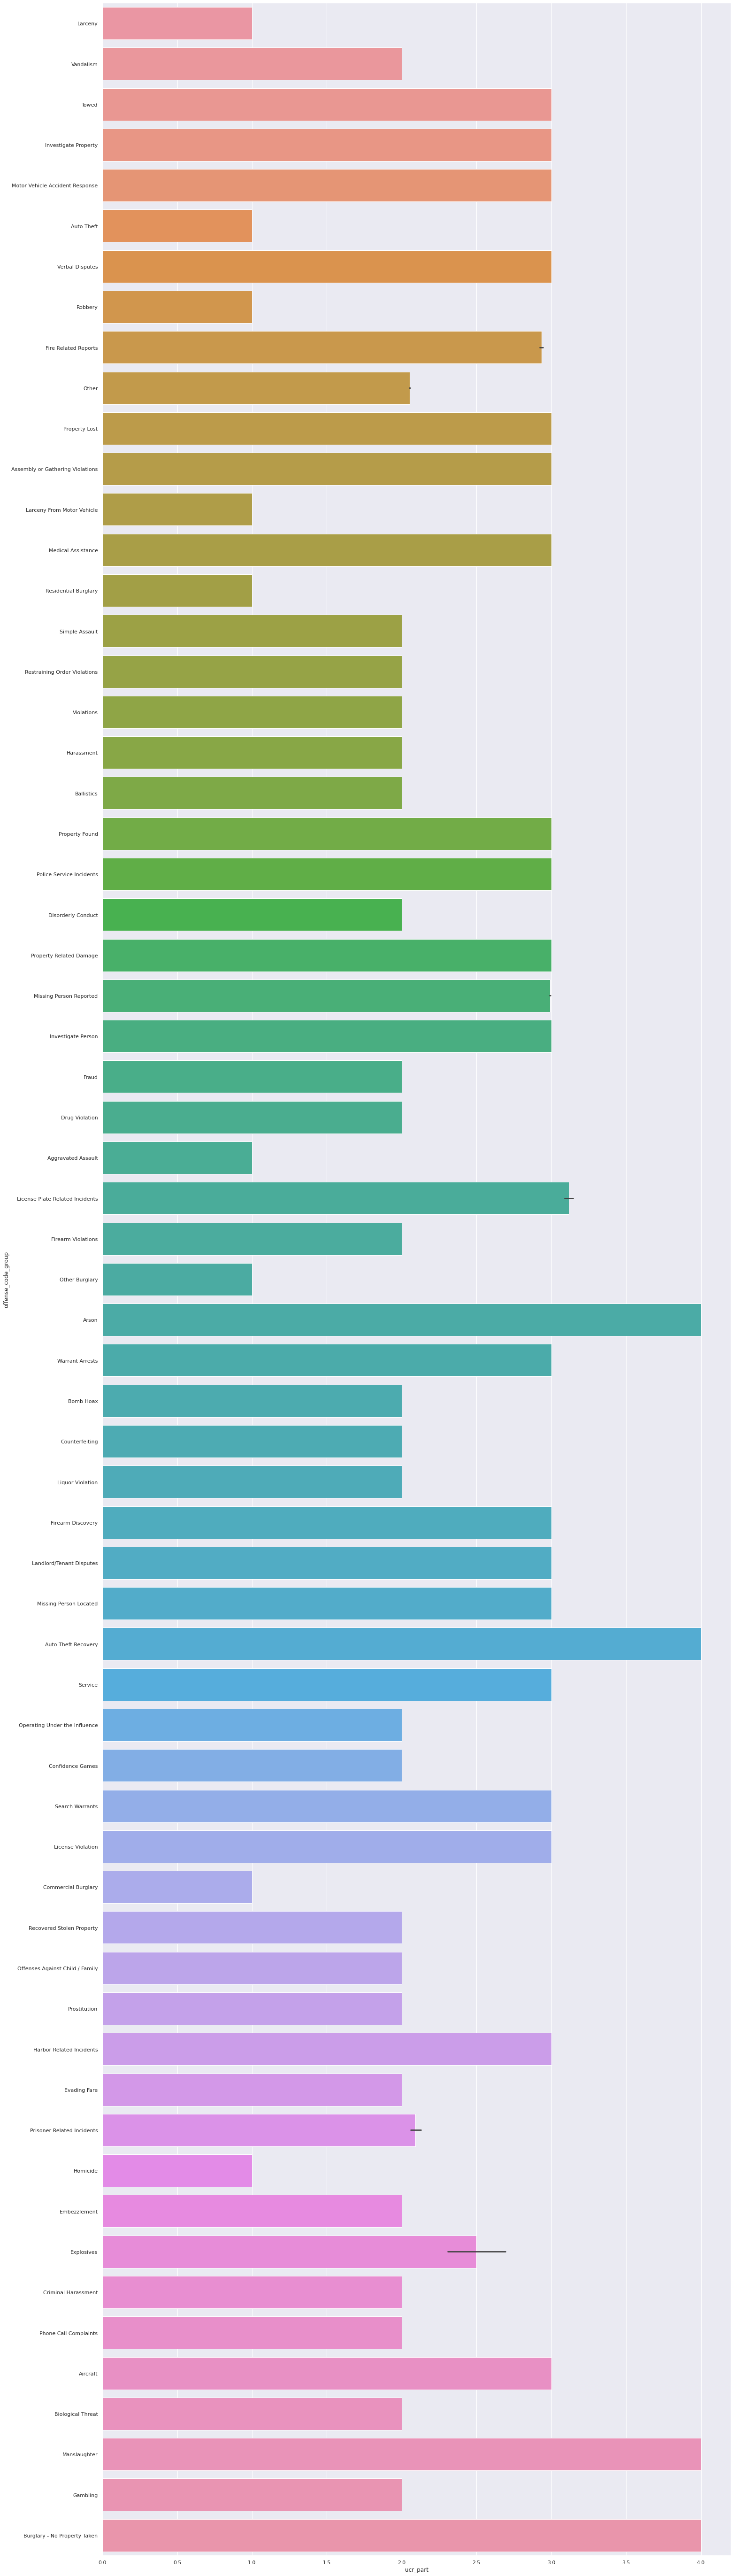

In [34]:
sns.set(rc= {'figure.figsize':(24,100)})            
sns.barplot(x="ucr_part",y="offense_code_group", data = df)


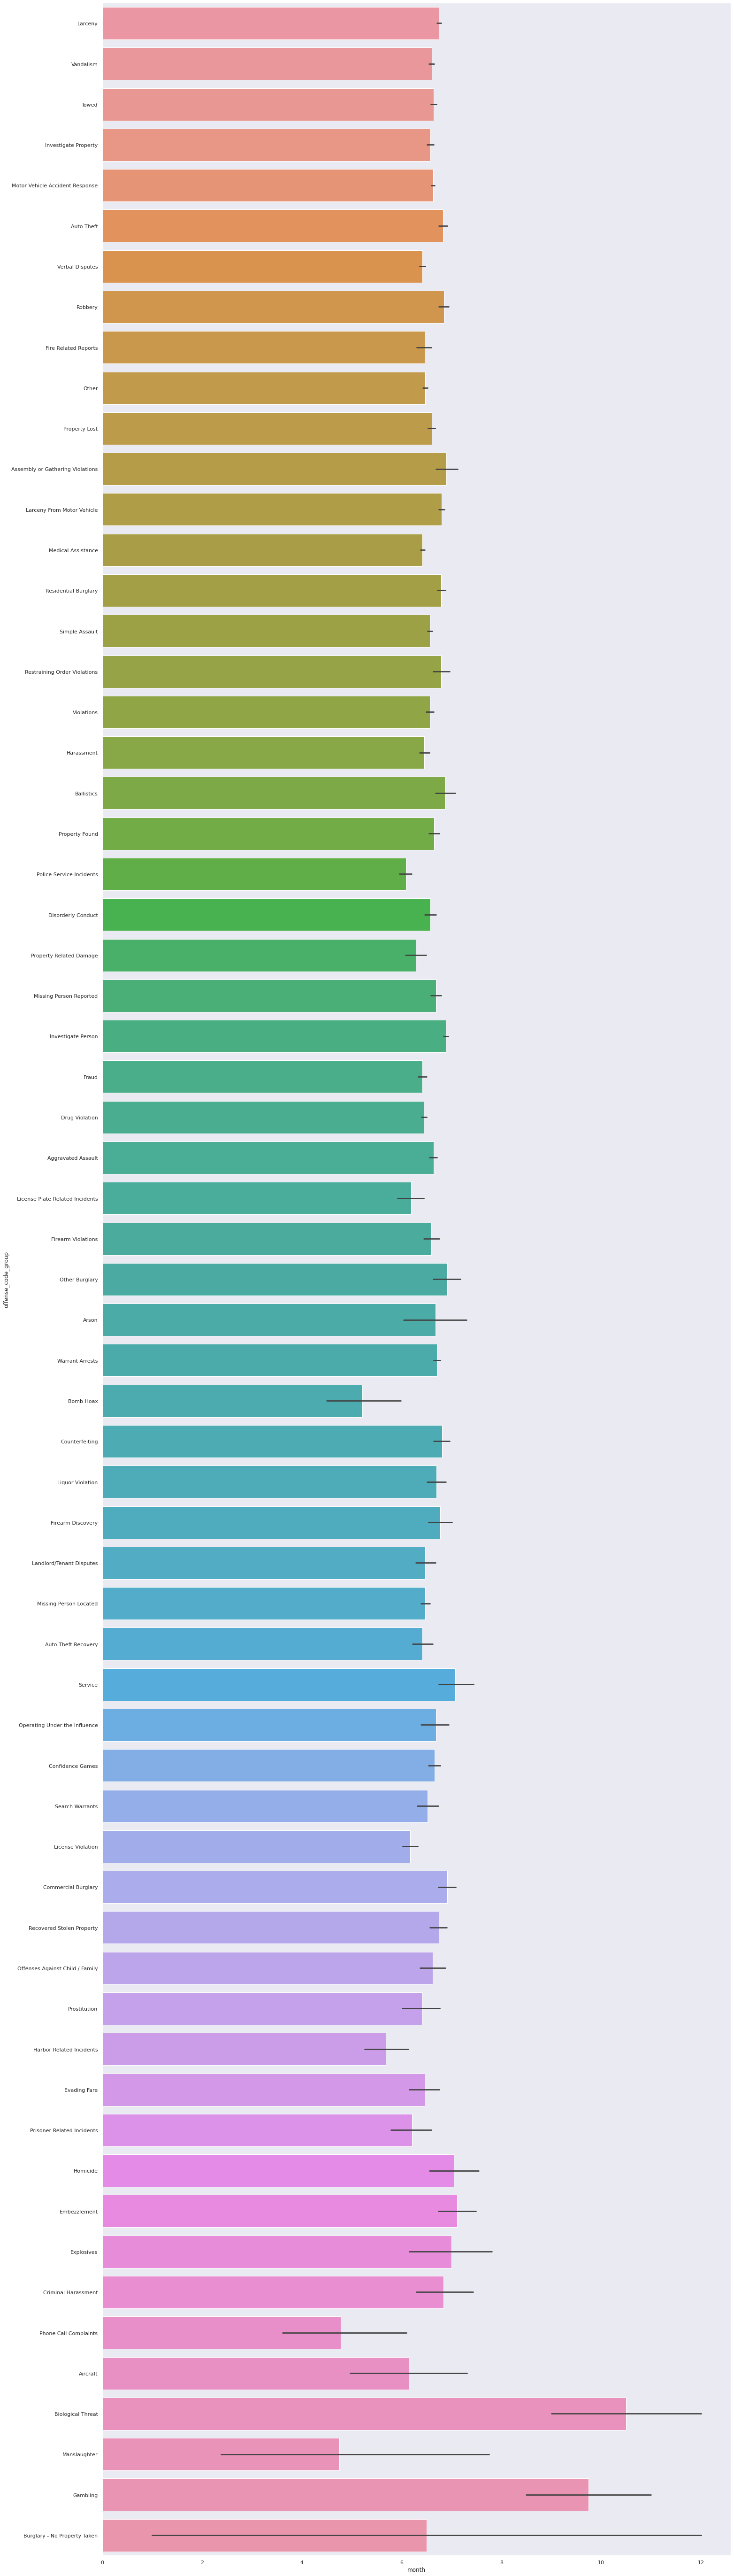

In [33]:
sns.set(rc= {'figure.figsize':(24,100)})
sns.set_theme(style="dark")
sns.barplot(x='month',y='offense_code_group', data=df)

The above graphs shows how likely a crime is to happen on each month over the entire time period



#### Line Graph

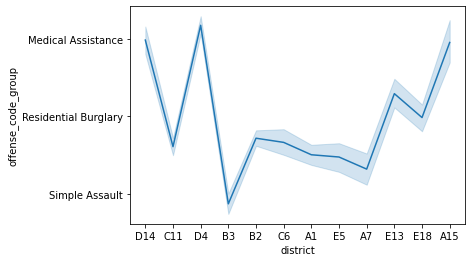

In [ ]:
#Creating a line plot
sns.lineplot(y='offense_code_group',x='district',data= df)


In [63]:
df['offense_code_group'].unique().sum()
df['offense_code_group'].value_counts()

Motor Vehicle Accident Response    36654
Larceny                            25861
Medical Assistance                 23475
Investigate Person                 18676
Other                              17990
                                   ...  
Explosives                            26
Manslaughter                           8
Gambling                               8
Burglary - No Property Taken           2
Biological Threat                      2
Name: offense_code_group, Length: 63, dtype: int64

The graph above is a depiction of the total number of offence groups per district, the offence groups is a group such as  Motor vehicle accident response, larnceny, e.t.c describe a particular type of crime. There are 63 groupings of crime in total. The y-axis of the graph represents the total number of crimes that happen per district

#### Boxen Plots


The boxen plot, otherwise known as a Letter-value plot, is a box plot meant for large data sets (n > 10,000). It is similar to a traditional box plot, however it essentially just plots more quantiles.

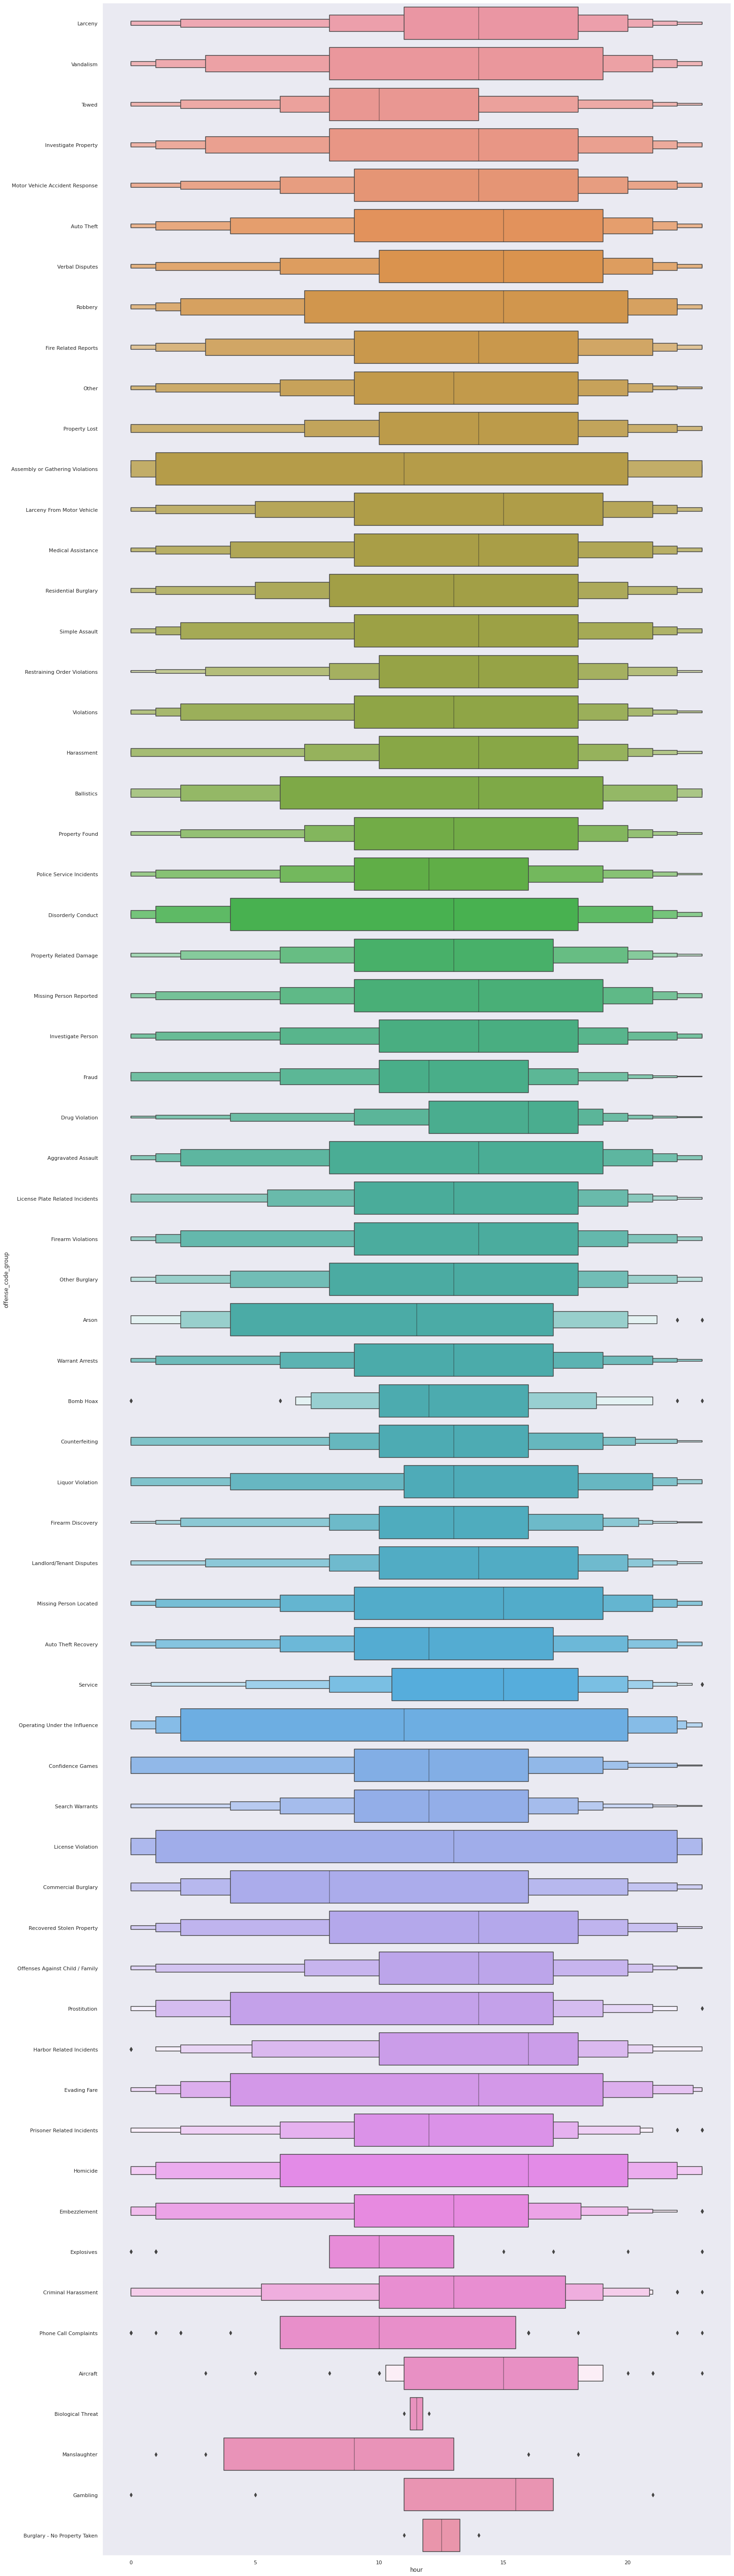

In [72]:
sns.boxenplot(y='offense_code_group',x='hour',data= df)

The boxen plot is used to see how crimes are more likely to be commited over the case of the day, each boxenplot is a type of crime group, with the x axis starting are 00:00 upto 23:59. This shows how some crimes such as Manslaughter tend to be commited during the daylight, this could be from accidents during peak and work hour while License violations can happen at almost any time of the day

#### Count Plots

Crimes Per District

Text(0.5, 1.0, 'Count of Total Crimes Per District')

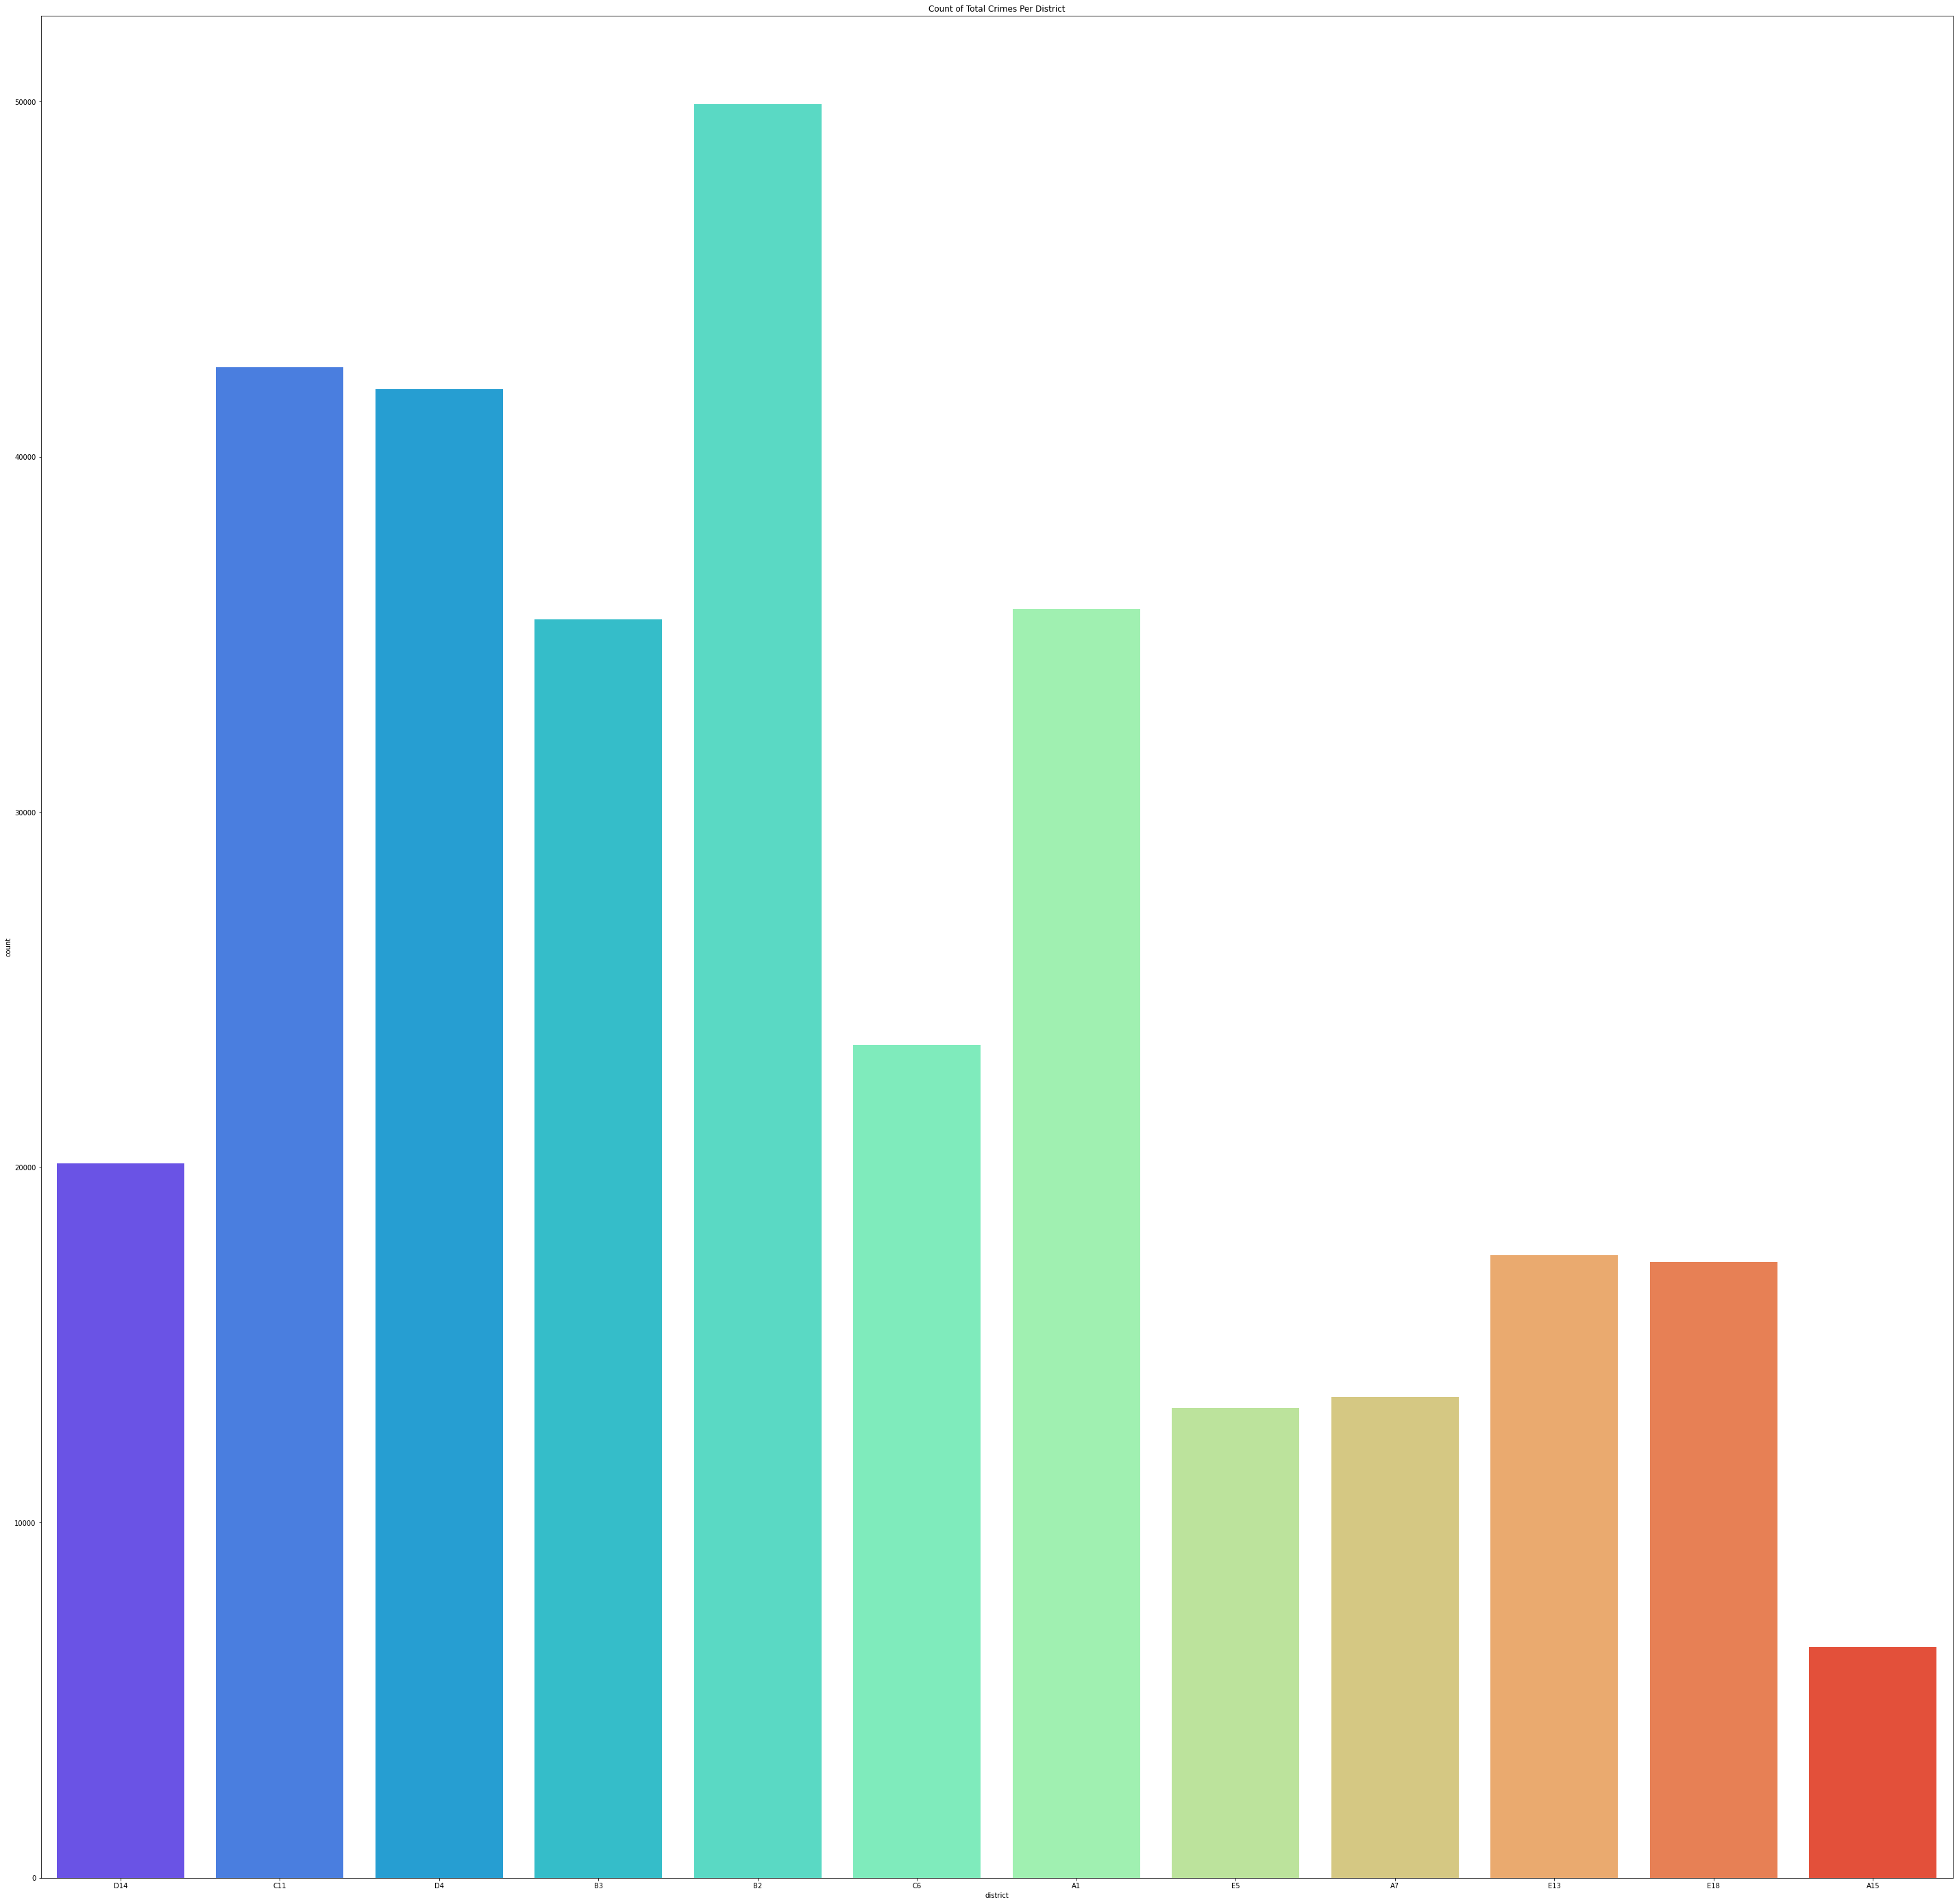

In [ ]:
plt.figure(figsize=(50,50))
sns.countplot(x='district', data=df, palette='rainbow')
plt.title("Count of Total Crimes Per District")

In [71]:
df['district'].value_counts()

B2     49924
C11    42513
D4     41907
A1     35708
B3     35428
C6     23451
D14    20118
E13    17530
E18    17339
A7     13541
E5     13231
A15     6505
Name: district, dtype: int64

The above bar graph is a visualization of how many crimes happened in each district for the entire period of 2015 - 2018, the graph shows the B2(Roxbury) district has the highest number of crimes overal, with the 'most safe' district was A15(Sudbury)

Crimes per Year

Text(0.5, 1.0, 'Count of Total Crimes Per Year')

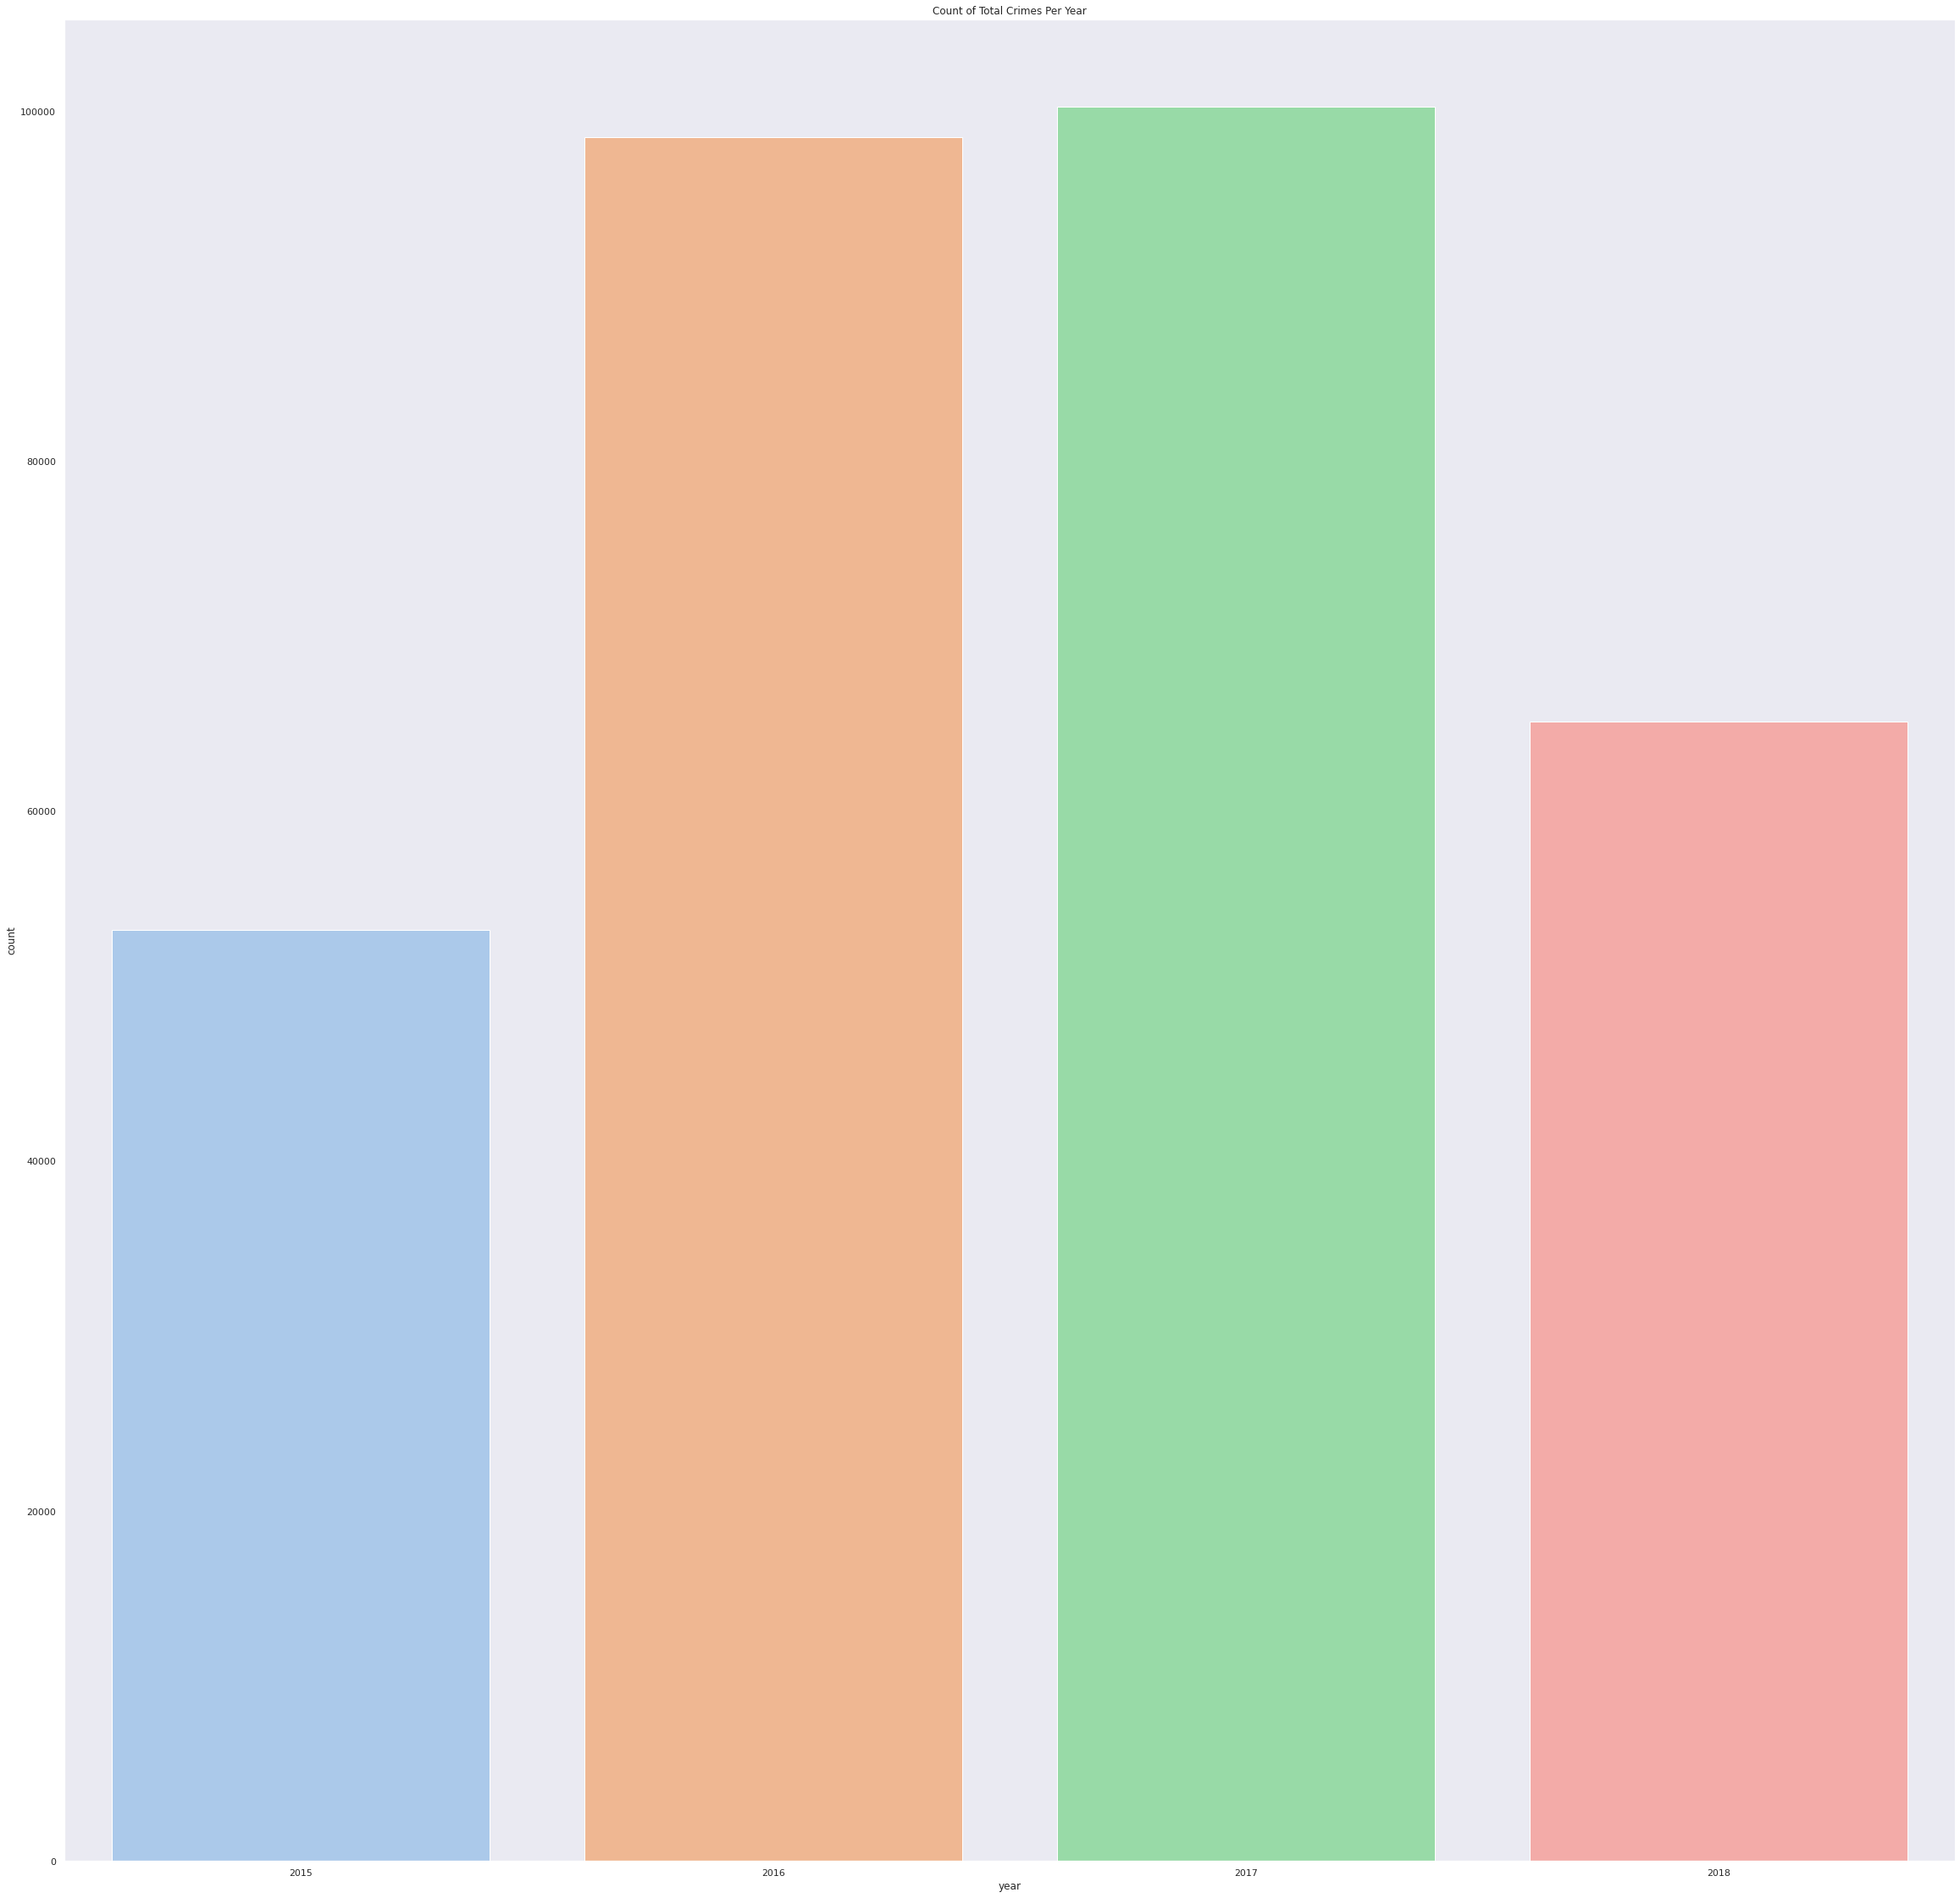

In [73]:
plt.figure(figsize=(40,40))
sns.countplot(x='year', data=df, palette='pastel')
plt.title("Count of Total Crimes Per Year")

The above graph shows how many crimes were commited per year over the 4 year period, the years 2016 and 2017 are especially bad above 80,000 reported crimes/cases repectively 

In [74]:
df['year'].value_counts()

2017    100269
2016     98559
2018     65125
2015     53242
Name: year, dtype: int64

Crimes Per Hour

Text(0.5, 1.0, 'Count of Total Crimes Per Hour')

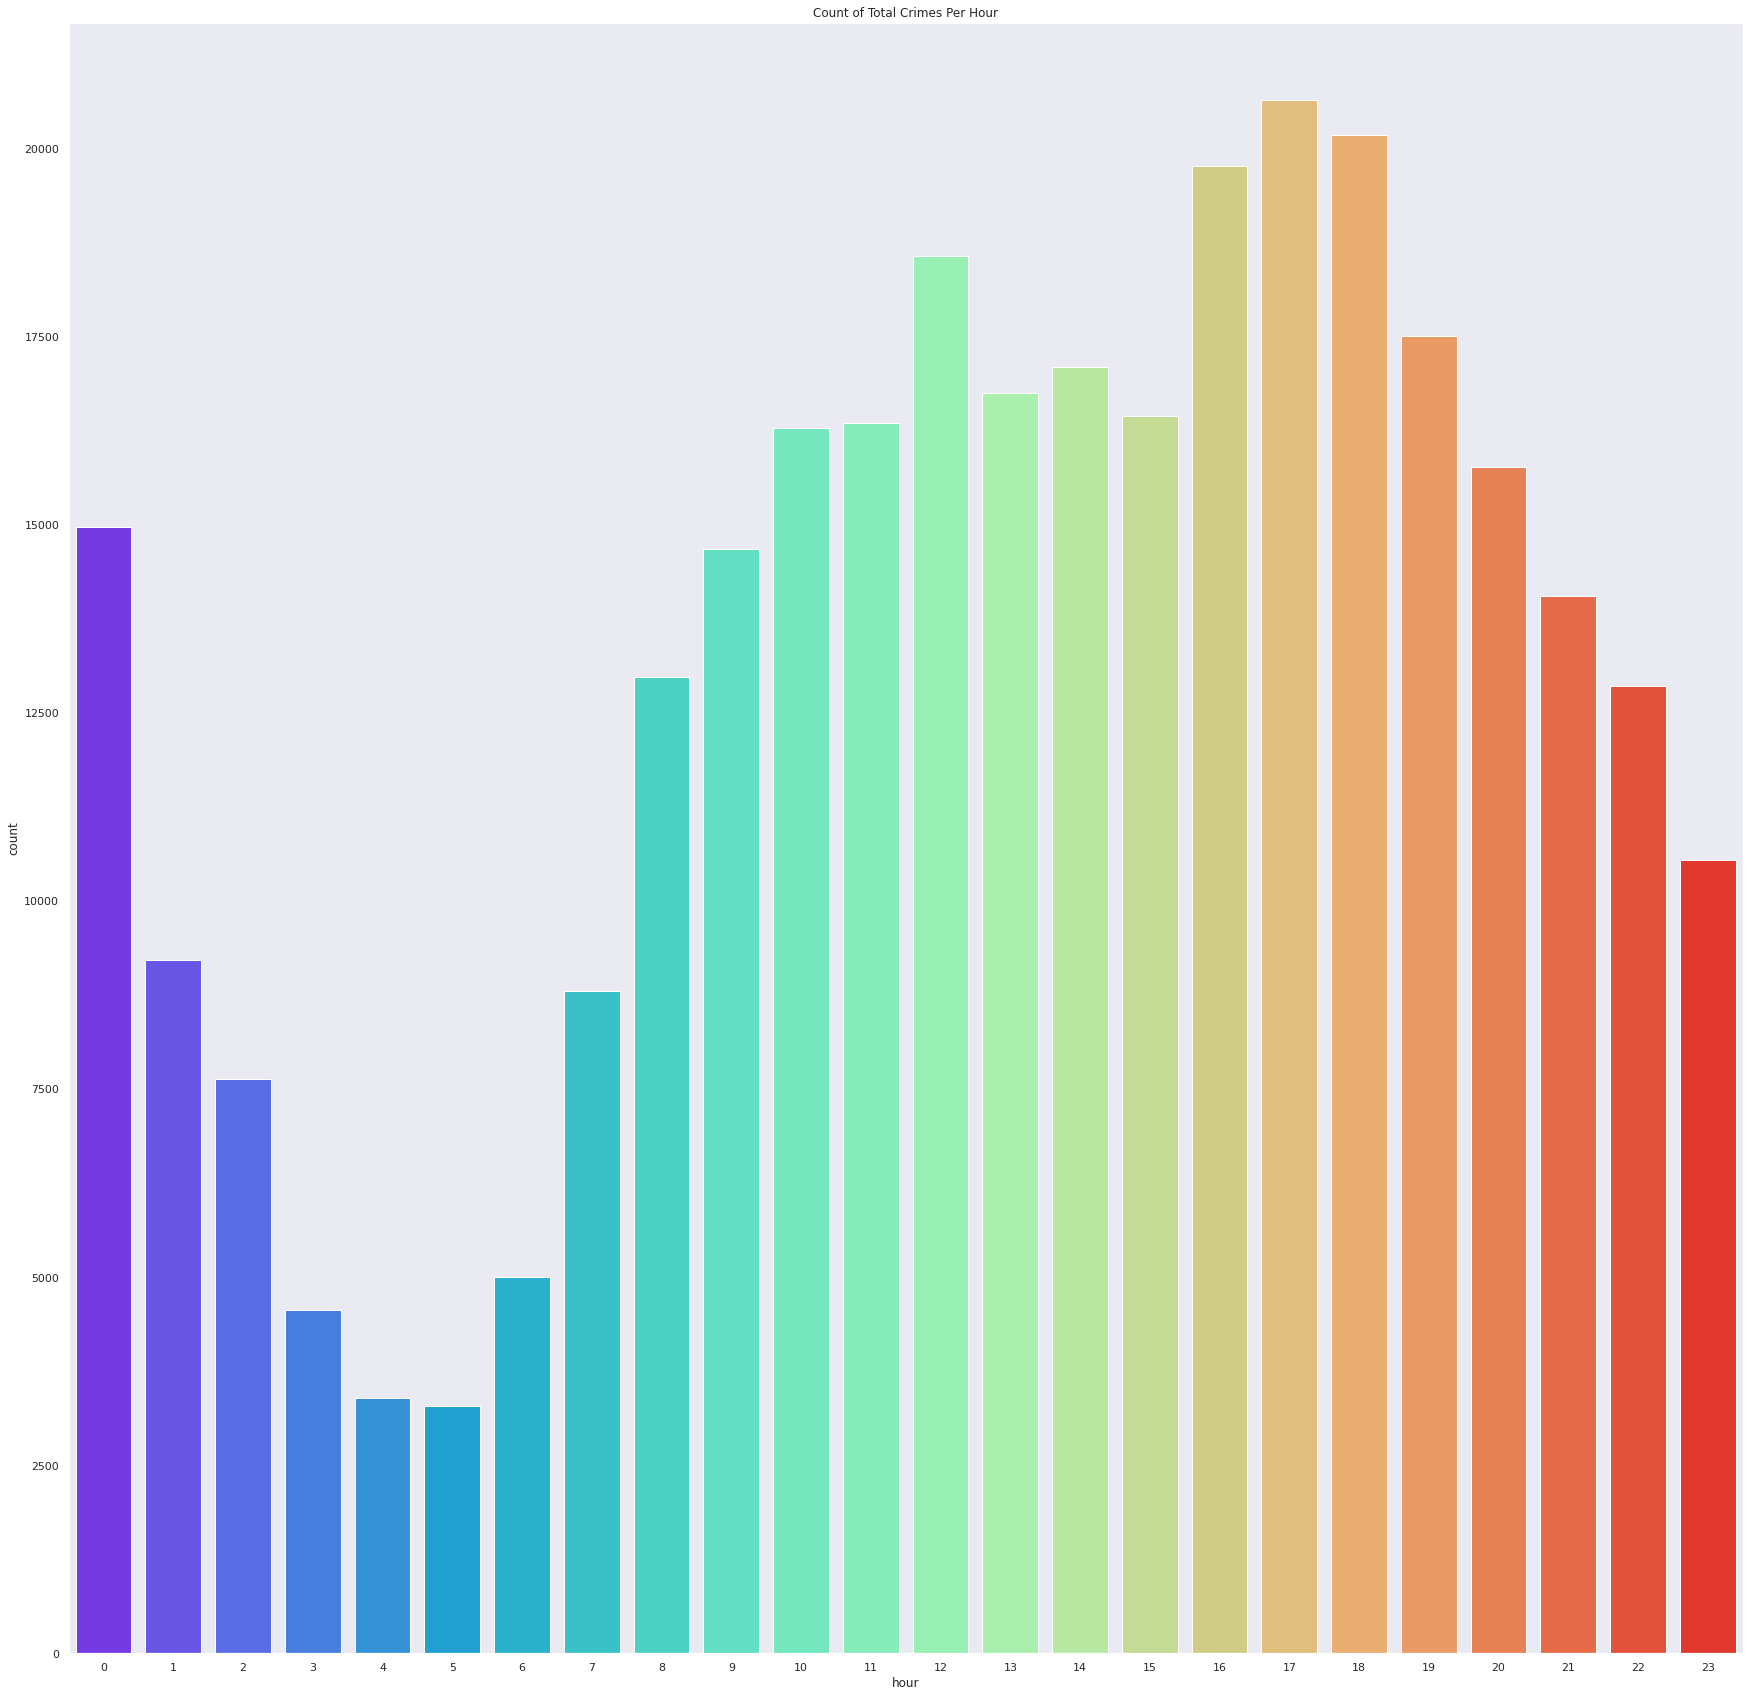

In [75]:
plt.figure(figsize=(30,30))
sns.countplot(x='hour', data=df, palette='rainbow')
plt.title("Count of Total Crimes Per Hour")

The above graph shows how many crimes were commited per hour over the entire period, from this we can see that betwen 5 and 6 pm are especially prone to crimes. This is around dusk when most citizens are heading home from work and might be more suceptible to them. At 5 am the least number of crimes are reported, there is a low chance of someone being awake

Crimes per Month

Text(0.5, 1.0, 'Count of Total Crimes Per Month')

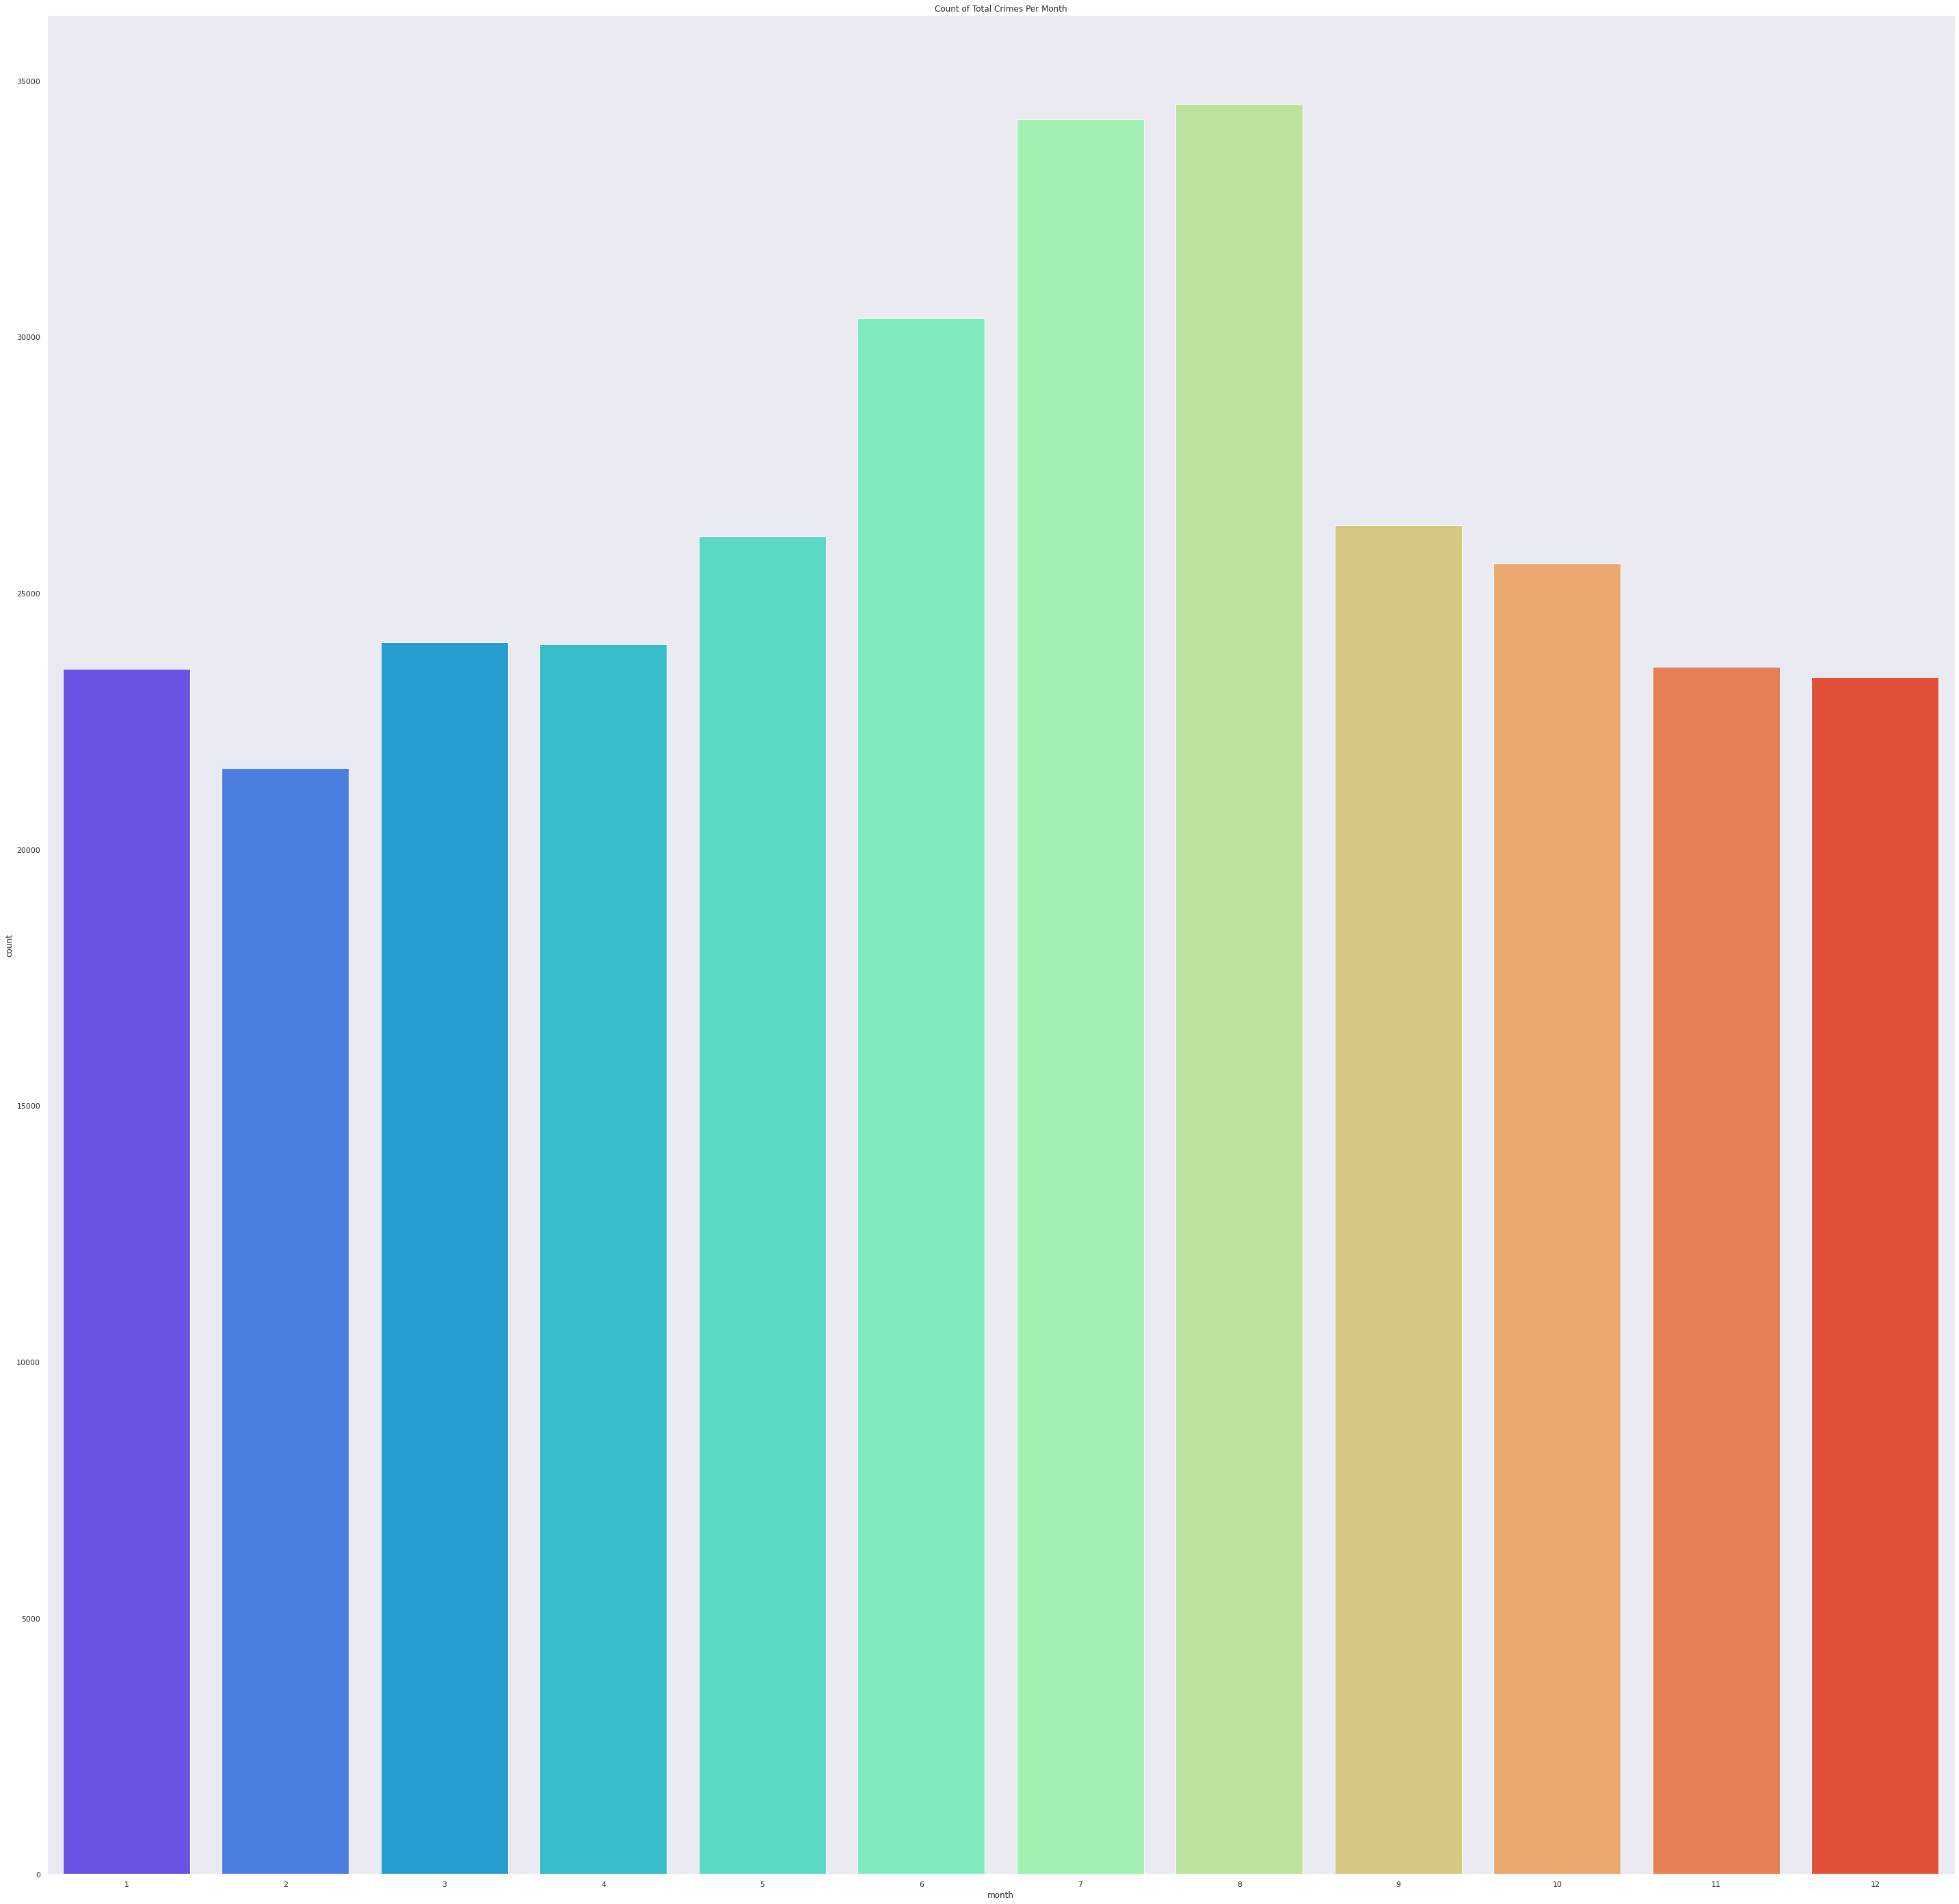

In [76]:
plt.figure(figsize=(50,50))
sns.countplot(x='month', data=df, palette='rainbow')
plt.title("Count of Total Crimes Per Month")

The above graphs displays hwo many crimes are commited per month, the months July and August have the most crimes which is during summer, more sunlight hours and more people outdoors. The month with the least was Febuary which is during winter, quite cold with most indoors

Total crimes recorded per month arranged by day

Text(0.5, 1.0, 'Count of Total Crimes Per month divide For each day')

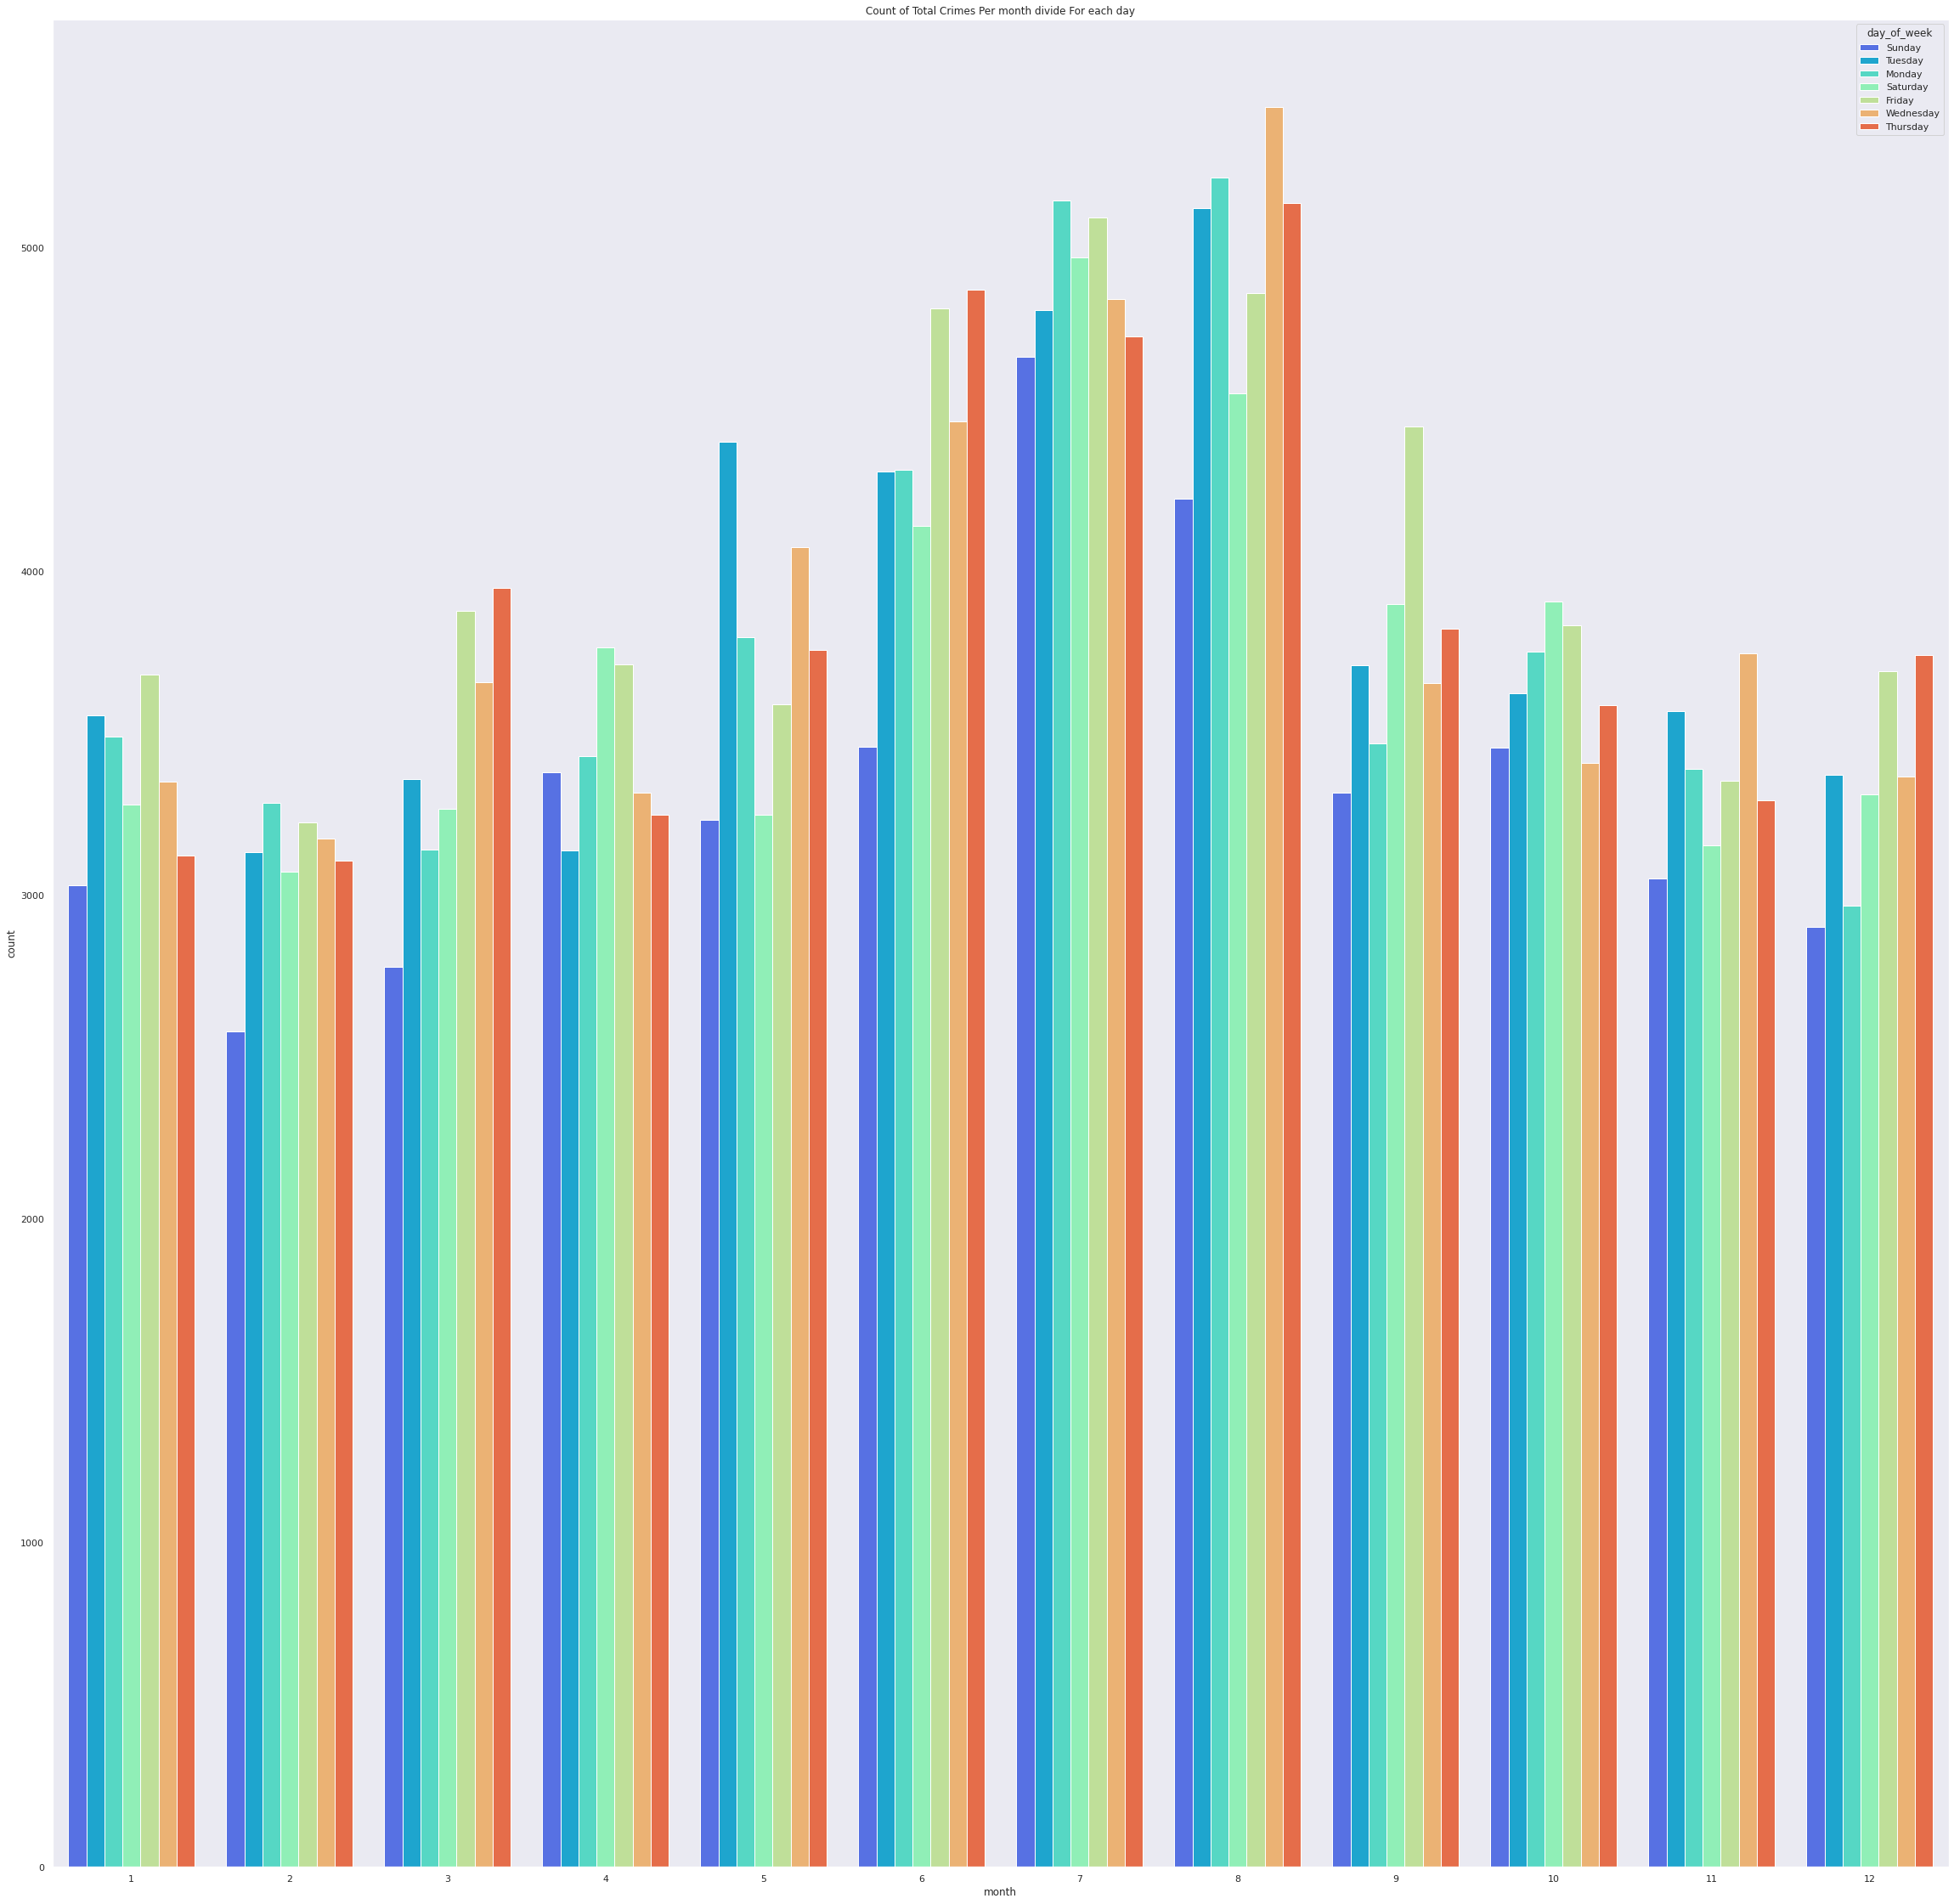

In [77]:
plt.figure(figsize=(40,40))
sns.countplot(x='month', data=df, palette='rainbow', hue='day_of_week')
plt.title("Count of Total Crimes Per month divide For each day")

The above graph shows a different view of how the crimes are commited over each month, segmented in days of the week. The wenesday of August had the most crimes reported over the four years, this is the time of the year where most festivals, outdoor activities happen, the time with the most human traffic. The sundays of Febuary's seem the most safest, its cold out and the majority of religeous people in boston are Catholics.

Total Crimes per year by each offense group

Text(0.5, 1.0, 'Count of Total Crimes Per year divide For each offense group')

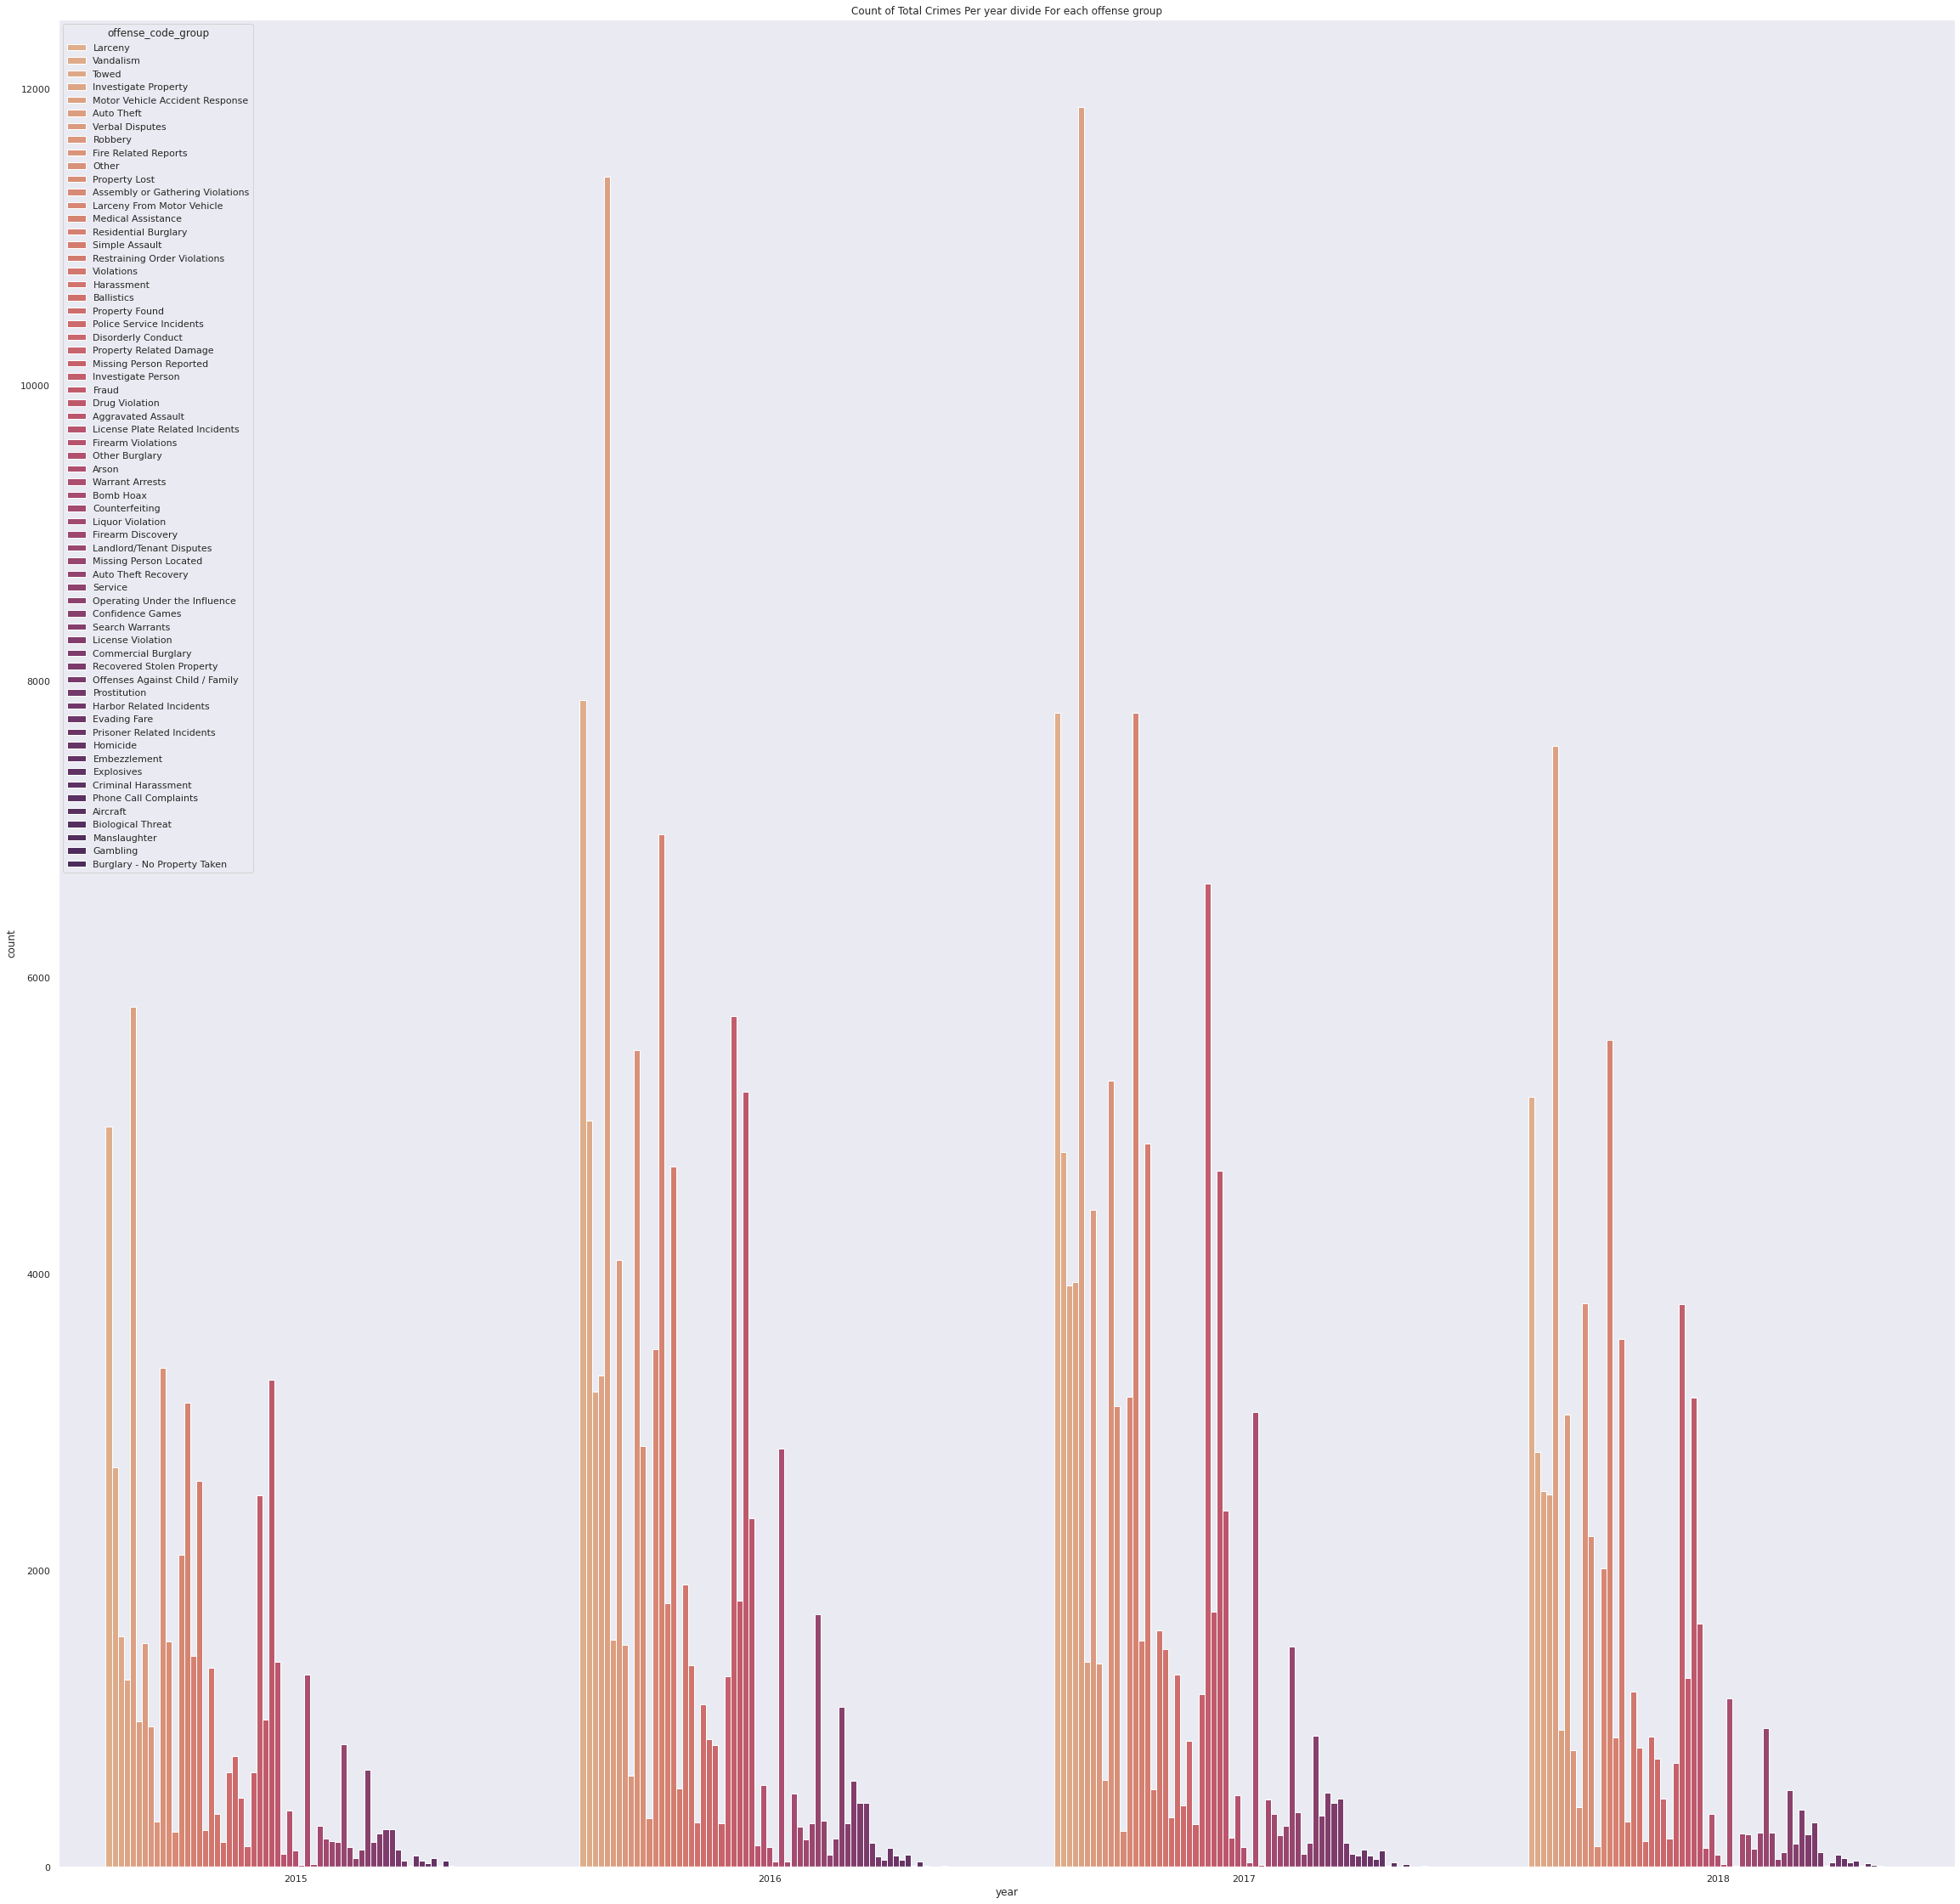

In [79]:
plt.figure(figsize=(40,40))
sns.countplot(x='year', data=df, palette='flare', hue='offense_code_group')
plt.title("Count of Total Crimes Per year divide For each offense group")

The graph above shows total number of crimes per offence groups, there is a key at the top right for what color corresponds to what offense group. This matches up with both the most repeated crime to be commited and in which year it occured. Motor vehicle on 2017 

Total crimes per year for each district 

Text(0.5, 1.0, 'Count of Total Crimes Per year divide For each district')

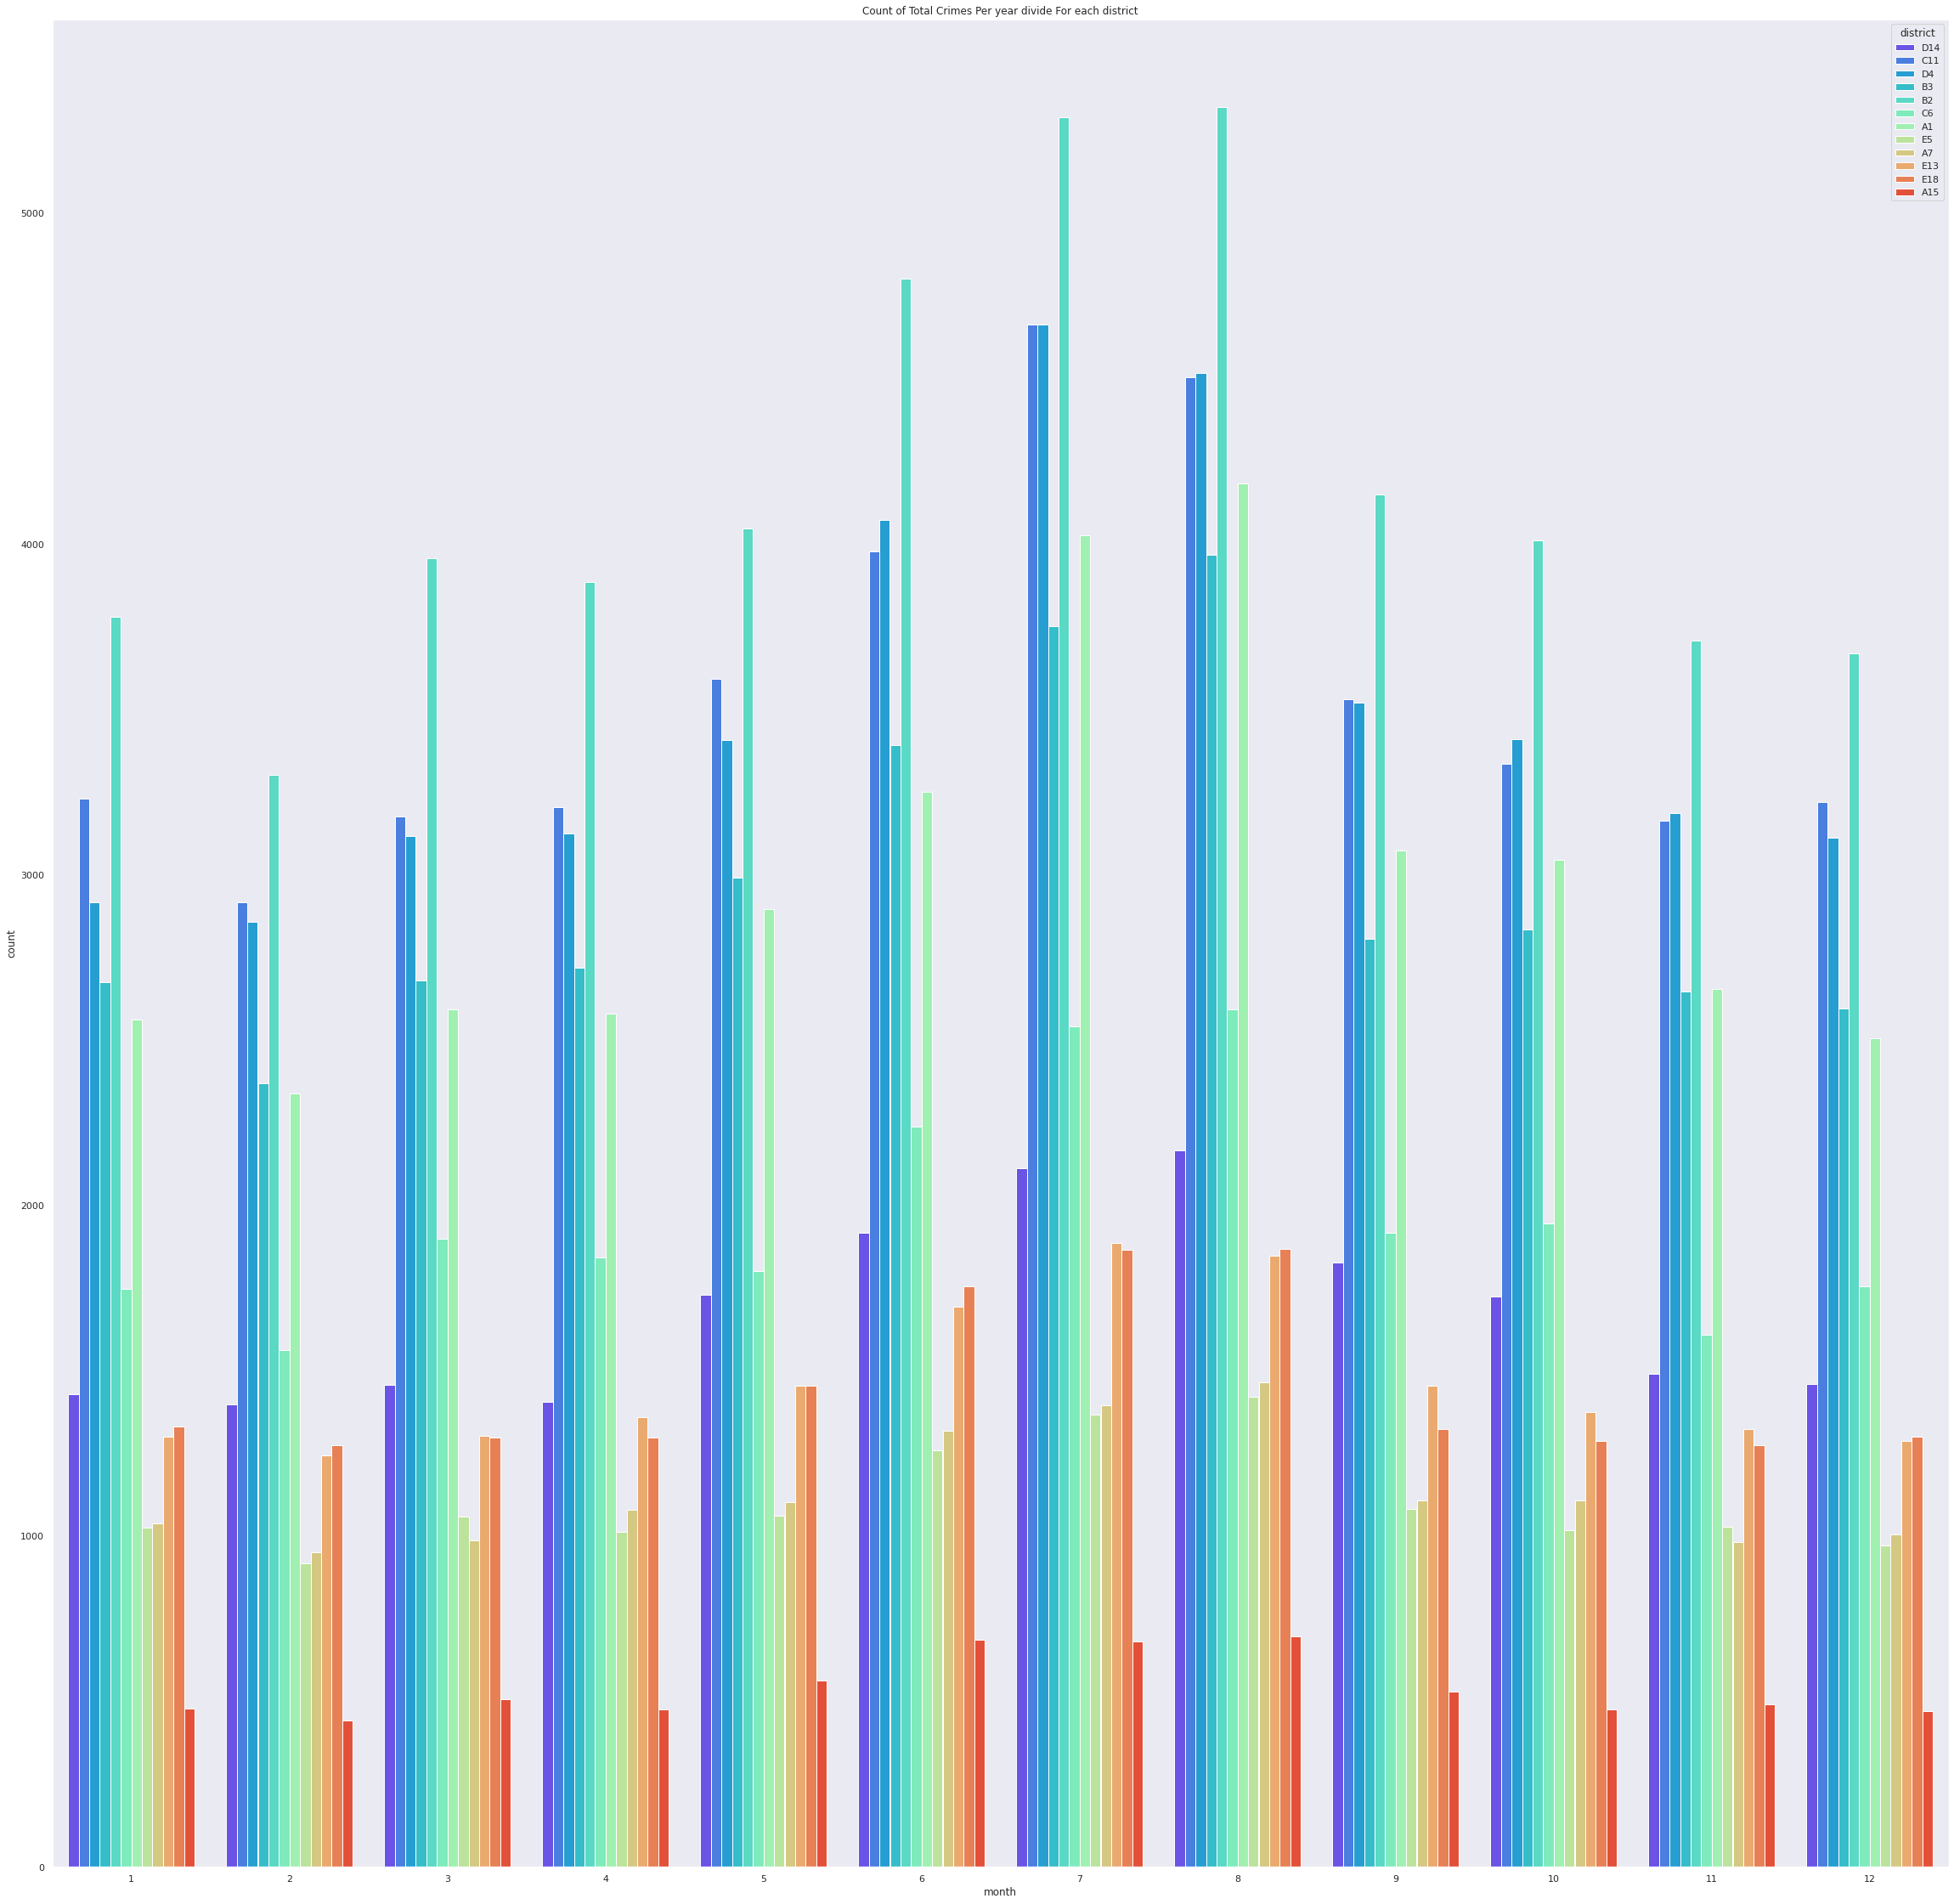

In [78]:
plt.figure(figsize=(40,40))
sns.countplot(x='month', data=df, palette='rainbow', hue='district')
plt.title("Count of Total Crimes Per year divide For each district")

The graph show the total number of crimes per month segmented by district that is line with out conclusions 

### Challenges

Challenge 1:
 
Understanding what was the most occurring type of crime in Boston and how they were committed using both python and SQL 

In [ ]:
groupby_df = df.groupby(["year", "month", "offense_code_group"]).count()
groupby_df.sort_values(by = "offense_code", ascending = False)["offense_code"]

In [ ]:
# Sql version
%%sql
select year,month,offense_code_group,count(offense_code_group) as offense_count from clean_crime
group by year ,month ,offense_code_group
order by offense_count desc , month asc limit 10

In [ ]:
# Sql version
%%sql
select year, month,offense_code_group,count(month) as month_count from clean_crime
group by month 
order by month_count DESC  , month 

Challenge 2:

What is the most occurring type of crime in Boston

In [ ]:
(df.groupby(["offense_code_group"]).count()).sort_values(by = "offense_code", ascending = False).head(1)["offense_code"]

In [ ]:
#sql version can show a list of most commited crimes arranged from the most to the least
%%sql
select offense_code_group,count(offense_code) as offense_count from clean_crime
group by offense_code_group
order by offense_code desc limit 5

Challenge 3:

What is the time of the year with the highest rates of crime

In [ ]:
groupby_df2 = (df.groupby(["year", "month"]).count()).sort_values(by = "offense_code", ascending = False)
groupby_df2.head(1)["offense_code"]

Challenge 4:

How they were committed ?

In [ ]:
groupby_df.loc[(2017, 8)]["offense_code"]

Challenge 5:

What point of the year is the most common type of crime

In [ ]:
groupby_df = df.groupby(["offense_code_group", "month"]).count()
groupby_df

In [ ]:
groupby_df.loc["Motor Vehicle Accident Response"].sort_values("offense_code", ascending = False).head(1)["offense_code"]

Challenge 6:

We want to get a clear understanding of what sort of crimes are mostly committed.

In [ ]:
df.groupby(["offense_code_group"]).count().sort_values(by = "offense_code", ascending = False)["offense_code"]

Challenge 7:

What crimes are most likely to happen

In [ ]:
df.groupby(["offense_code_group"]).count().sort_values(by = "offense_code", ascending = False)["offense_code"].head(5)

Challenge 8:

If any crimes are linked to particular dates or months of a year

In [ ]:
groupby_df = df.groupby(["offense_code_group", "year", "month"]).count()
groupby_df["offense_code"]

**Main Objective**: The purpose for this study is to understand the areas in Boston that are prone to crime from the year 2018.

In [ ]:
##The above results can also be obtained using SQL as follows
%%sql
select district,count(district)as dist_count from clean_crime 
group by district   
order by dist_count desc

Challenge 9:

What hours of the day is crime happening often

In [ ]:
%%sql
select hour ,count(hour) as reccuring_crime_hours from clean_crime
order by reccuring_crime_hours desc

Challenge 10:

How best to deploy the policing resources of Boston

In [ ]:
(((df.groupby(["district", "offense_code_group"])).count()).sort_values("offense_code", ascending = False)).head(10)

#### Conclusion

In conclusion, I believe that the experiment was a success. We were able to find out the main areas where crime happened. We were able to do this, due to the specific objectives that were set. This allowed us to understand the data better. In addition it helped us to understand the main objective in reference to the data. This allowed us to analyse the data and draw conclusions based on it which was written down in the analysis section.

#### Recommendations

From our analysis, there are several recommendations that we can deduce for the Boston Police Department. They are outlined as below: 



*   From the analysis, we saw Motor Vehicle Accident Response was the highest crime in Boston. The main causes for these accidents within the city include: Overspeeding, Inexperienced drivers, drunk driving and Unsafe lane changes. The department should look into these factors to reduce the number of Motor Vehicle Accidents in the area. 
*   From the analysis, we were able to conclude that the month with the highest level of crimes is August. From our research, in the month of August people are usually on summer holidays thus they will be out more often than not. Due to their celebratory mood, they tend to engage in social activities like drinking. It is confirmed that drinking comes with its own share of problems. Also due to the high temperatures people tend to leave their doors and windows open thus attracting unnecessary attention from the wrong crowd. The police department should be on the lookout during this specific month. 
*   The District of B2(Roxbury) in Boston had the highest number of crimes. Majority of these crimes occur in this town due to: The education policies are not favourable thus encouraging school dropouts, Also the number of police force deployed in that area is minimal, The lack of neighbourhood and police collaboration is also a major factor, in addition,re-emergence of gang groups due to rising poverty levels has seen many affected by this factor and lastly, ineffective community policing plays a big role. The police department should take these factors into consideration and fix the system.
*   At time periods between 22:00 and 0300, security measures need to be improved to make Boston a safe town. During this time, you find most people out in the streets are probably drunk and it is at that moment they are disoriented and most vulnerable. Gangs will want to take advantage of that moment and commit a crime, most likely rob and batter the drunks.  From the above incidence, increasing police patrols would greatly reduce late night crimes. 